

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

<!-- #### General Guidance

I'm expecting a product that could be handed to a student and they could quickly learn a new concept. Ask yourself, could someone new to machine learning understand my workflow?

#### Expectations on the Workflow

* include short descriptions, no 2 code blocks should be adjacent, always have a short statement to explain the next code block

* be as concise as possible:

    * use point form (except for the executive summary) 
    * use effective, creative figures that compine what could have been in multiple plots
    * every line of code, statment or figure must have purpose
    * conciseness is part of the grading, don't add content that isn't needed
    
* be very clear

    * great executive summary
    * label every axis
    * use readable code, logical variable names, use available functionality for compactness
  
#### Using Code From Others
  
You may use blocks/snipets of code from other sources with citation. To cite a set of code separate in a block and do this in the markdown above the block.

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubSurfuceDataAnalytics_PCA.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb).

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean):
# load the variogram
    nst = vario['nst']; pmx = 9999.9
    cc = np.zeros(nst); aa = np.zeros(nst); it = np.zeros(nst)
```

or use inline citations such as this for a few of lines of code.

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean): # function from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb 
```

#### The Workflow Template

Here's the template for your workflow.

____________________
 -->


## Derivation of a correlation for flash calculation initialization

#### Sofiane H, Achour
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell school fo Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Jack Xiao, Graduate Student, The University of Texas at Austin
##### [Twitter](https://twitter.com/jackxiao6) | [LinkedIn](https://www.linkedin.com/in/yuchen-jack-xiao-b1b20876/)

### Executive Summary

Flash calculation algorithms solve the equilibrium phase compositions for a system at a specified
- total volume,
- composition, and 
- temperature.

using an algorithm which iteratively update the equilibrium phase properties (e.g. total composition, molar density, pressure, temperature) to the equilibrium solution (e.g. composition, molar density, pressure, and temperature for the oil and gas phases) from an initial guess. The convergence behavior is strongly dependent on the proximity of the initial guess to the final solution. However, there is currently no robust correlation for computing an initial guesses to the equilibrium phase compositions.

In this work, a new universal correlation was developed to compute an initial guess to the flash calculation algorithm. This is done by approximating the hyper-dimensional thermodynamic free energy surface (spanning the component density space) to a 1-dimensional line and fitting correlations to the distance between the total component density and that of the oil and gas phases along that line. This work showed that the distance to the oil and gas phases can be reasonably modeled using a polynomial and linear correlations when the 1-dimensional reduction of the response features is reasonably accurate and when the overall mixture is liquid-like. Future work should include the fitting of correlations to the oil and gas distances in cases where the overall mixture is gas-like, and testing should be done using fluid models with a different number of components to confirm the universality of the correlation.

### Background

Flash calculations compute the phase equilibrium using the first and second law of thermodynamics as well as an equation of state. Fundamental explanations for those three elements are necessary before exploring the workflow.
- The first law of thermodynamics imposes the conservation of mass. In other words, if a system is defined as having 3 moles of methane and 2 of ethane, the moles of methane and ethane in the oil phase and gas phases must add up to 3 and 2 respectively.
- The second law of thermodynamics says that the equilibrium for any system at a fixed temperature, overall composition and volume is the solution to the global minimum of the Helmholtz free energy. The only processes that we consider for mixtures to alter their energy is splitting into two or more phases. The Helmholtz free energy is a hyperdimensional surface which spans the component density/concentration space. The number of dimensions for this variable space is equal to the number of components contained in a mixture.
- An equation of state is an analytical correlation between pressure, density, temperature, and composition. In this study, we use the Peng-Robinson equation of state. This equation of state can also be used to derive an analytical expression for the Helmholtz free energy which is shown in the figure below for a binary mixture of methane and n-decane.

The Helmholtz free energy surface spans the component density variable space. The component density $d_i$ is simply the number of moles $n_i$ of a given component (e.g. methane or ethane) divided by the volume of the phase (e.g. oil or gas). If we assume that the overall mixture formed a phase, then its Helmholtz free energy would be represented by the green dot.

<img src="https://raw.githubusercontent.com/sachour/ML_final_project/main/Helmholtz.png" width="500">


At equilibrium, the plane tangent to the Helmholtz free energy of the oil phase (dark plane) is parallel to the plane tangent to the Helmholtz free energy of the gas phase (blue plane). The oil, gas, and overall phase are all aligned on a straight line in component density space due to the first law of thermodynamics. This straight line will be referred to as the splitting axis.

<img src="https://raw.githubusercontent.com/sachour/ML_final_project/main/Helmholtz2.png" width="500">

The idea for this project is therefore to approximate the direction of the splitting axis by the gradient of the lowest eigenvalue of the Helmholtz free energy surface. Once we approximate the direction of this axis, we can reduce the multi-dimensional coordinates of the oil and gas phases to two. The two coordinates would then be the distance between the green point and the dark and blue points along the approximated splitting axis. These distances can be obtained by projecting the vector extending from the green dot to the dark and blue dots onto the splitting axis.
<br>
The training data is composed of propertie of the Helmholtz free energy surface at the overall phase. It is generated by running many flash calculations at random compositions with a given fluid model of 14 components. The values of the projected distance of the oil and gas phases from the overall phase are denoted as Odist and Gdist in the training data.
<br>
The choice of approximating the splitting axis by the gradient of the lowest eigenvalue can be explained using simple geometry. The Helmholtz free energy surface is generally positively curved except along the splitting axis of the oil/gas phases, where the surface presents two humps. This is similar to camels. When viewed from the front (upside-down),
<img src="https://raw.githubusercontent.com/sachour/ML_final_project/main/cammel_1hump.png">
its back looks globally convex. However, if viewed from the side, we can clearly see the two humps.
<img src="https://raw.githubusercontent.com/sachour/ML_final_project/main/camel_twohumps.png">

Across the camel's two humps, the curvature is seen to clearly become positive, negative, and positive again. Therefore, the axis along which the two humps exist is indicated by the direction along which the lowest curvature changes the most. The principal curvatures of the surface are equal to the eigenvectors of the Hessian matrix. The lowest eigenvalue is the one that switches from positive to negative near the two humps. The direction of greatest change of that eigenvalue can be numerically computed as its gradient. The same thing is done to the Hyper-dimensional Helmholtz free energy surface. 
<br>
<br>
The normalized projected distance along the approximated splitting axis is calculated using the dot product
\begin{equation}
O_{dist}=\frac{\vec{\nabla} (∆min)\cdot(\vec{d}_{ref}-\vec{d}_o)}{||\vec{\nabla} (∆min)||||\vec{d}_{ref}||}
\end{equation}
\begin{equation}
G_{dist}=\frac{\vec{\nabla} (∆min)\cdot(\vec{d}_{ref}-\vec{d}_g)}{||\vec{\nabla} (∆min)||||\vec{d}_{ref}||}
\end{equation}
where $\vec{d}_{ref}$, $\vec{d}_o$, and $\vec{d}_g$ are the vectors of coordinates for the overall phase, oil, and gas phases in density space.
<br>
<br>
The next challenge is the selection of predictor features for the training data. The objective of this research is to create a universal correlation which works regardless of how many different types of molecules/components are present in a mixture. In order to build a model with a fixed number of predictor features, we should only use the variables that represent the mixture as a whole (e.g. pressure) instead of component-specific variables (e.g. molecular weight). This neglect of component-specific properties will allow us to build more flexible models but will also lose much information related to the shapoe of the Helmholtz free energy curve. This loss of information can be simulated as a machine learning problem with a significant irreducible uncertainty.
<br>
<br>
A new concept that is introduced in this project is the derivation of a Liquid Phase Indicator (LID). This is a value that would be positive of the overall phase is liquid-like and negative if it is gas. The derivation for this variable relies on the shape of the Helmholtz free energy along the approximated splitting axis as shown on the schematic below. Any mixture that has a physical density must lie on the correct side of the maximum density plane. This mathematical criterion is expressed as
\begin{equation}
\vec{d}\cdot\vec{b}<1
\end{equation}
where $\vec{b}$ is a vector of constants for each component in a mixture. Since oleic phases tend to have higher densities than gas phases, the hump of the oil phase tends to be closer to the plane of maximum density.
<img src="https://raw.githubusercontent.com/sachour/ML_final_project/main/Helmholtz_approximated.png" width="350">

If we ploted the corresponding lowest eigenvalue of the Hessian of the Helmholtz free energy along that 1-dimensional line, it would look like the following.

<img src="https://raw.githubusercontent.com/sachour/ML_final_project/main/%E2%88%86min_approximated.png" width="350">

The vector correponding to the gradient of the lowest eigenvalue is also shown to be pointing away from the maximum density plane since it points towards the direction of maximum increase. This direction is what would be expected for a gas-like overall phase. However, if the overall mixture were more similar to a liquid, the greeen dot would be on the other side of the parabola, and the gradient would be pointing towards the maximum density plane. The direction of the gradient relative to the maximum density plane can then tell us the identity of our overall phase. This can be numerically evaluated by taking the dot product of the gradient and $\vec{b}$ vector
\begin{equation}
LID=\frac{\vec{b}\cdot \vec{\nabla} (∆min)}{||\vec{\nabla} (∆min)||}
\end{equation}

LID is normalized by the norms of both vectors to be used for building correlations in this project, however, if used to determine whether a phase is like a liquid, the normalization would be unnecessary.

### Import Packages

We will be using the following libraries in this workflow. 


In [1]:
import numpy as np                                              # ndarrys for gridded data
import pandas as pd                                             # DataFrames for tabular data
from scipy import stats                                         # summary statistics
import matplotlib.pyplot as plt                                 # for plotting
import seaborn as sns                                           # for matrix scatter plots
from scipy import linalg                                        # for linear r.egression
from sklearn.decomposition import PCA                           # PCA program from scikit learn (package for machine learning)
from sklearn.linear_model import LinearRegression               # linear regression model
from sklearn.preprocessing import StandardScaler                # standardize variables to mean of 0.0 and variance of 1.0
from sklearn.metrics import mean_squared_error, r2_score        # specific measures to check our models
from sklearn.feature_selection import mutual_info_regression    # Mutual information calculation
from sklearn import metrics                                     # measures to check our models
from sklearn.model_selection import train_test_split            # train and test split
import matplotlib as mpl                     # Set the visual parameters of the plots below:
mpl.rcParams['axes.linewidth'] = 2.          #  - Line width of plot edges
mpl.rcParams['axes.edgecolor'] = 'gray'      #  - Color of plot edges
mpl.rcParams['font.size'] = 10               #  - Font size for all labels
mpl.rcParams['font.family'] = 'Arial'        #  - Font style for all labels


### Functions

The following functions will be used in the workflow.

In [2]:
#Partial Correlation in Python (clone of Matlab's partialcorr)

#This uses the linear regression approach to compute the partial correlation 
#(might be slow for a huge number of variables). The algorithm is detailed here:

# http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression

#Taking X and Y two variables of interest and Z the matrix with all the variable minus {X, Y},
#the algorithm can be summarized as
#    1) perform a normal linear least-squares regression with X as the target and Z as the predictor
#    2) calculate the residuals in Step #1
#    3) perform a normal linear least-squares regression with Y as the target and Z as the predictor
#    4) calculate the residuals in Step #3
#    5) calculate the correlation coefficient between the residuals from Steps #2 and #4; 
#    The result is the partial correlation between X and Y while controlling for the effect of Z

#Date: Nov 2014
#Author: Fabian Pedregosa-Izquierdo, f@bianp.net
#Testing: Valentina Borghesani, valentinaborghesani@gmail.com


def partial_corr(C):
#    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
#    for the remaining variables in C.

#    Parameters
#    C : array-like, shape (n, p)
#        Array with the different variables. Each column of C is taken as a variable
#    Returns
#    P : array-like, shape (p, p)
#        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
#        for the remaining variables in C.

    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

# functions taken (without modification) from http://davmre.github.io/blog/python/2013/12/15/orthogonal_poly
# appreciation to Dave Moore for the great blog post on titled 'Orthogonal polynomial regression in Python'
# functions are Dave's reimplimentation of poly() from R

def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha

def ortho_poly_predict(x, alpha, norm2, degree = 1):
    x = np.asarray(x).flatten()
    n = degree + 1
    Z = np.empty((len(x), n))
    Z[:,0] = 1
    if degree > 0:
        Z[:, 1] = x - alpha[0]
    if degree > 1:
      for i in np.arange(1,degree):
          Z[:, i+1] = (x - alpha[i]) * Z[:, i] - (norm2[i] / norm2[i-1]) * Z[:, i-1]
    Z /= np.sqrt(norm2)
    return Z

### Load Data

The following workflow applies the .csv file 'fitting_data.csv', a synthetic dataset calculated with a FORTRAN code.

We will work with the following features:
amix	bmix	P	Vm	F1	F2	F3	F4	F5	F7	∆min	LID	d∆	Gdist	Odist

* **amix**  - Mixture attraction parameter of the equation of state model and has units of $bar m^6/mol$. It is calculated using the Peng-Robinson Equation of State and the van der Waals mixing rules. Its parameters are the critical temperature, pressure, acentric factor, and the binary interaction parameters.
* **bmix**  - Mixture co-volume parameter of the equation of state model and has units of $m^3/mol$. It is calculated using the Peng-Robinson Equation of State and the van der Waals mixing rules. Its parameters are the critical temperature, pressure, and acentric factor.
* **P**     - Pressure in units of bar.
* **Vm**    - Total molar volume $\underline{V}$.
* **F1**    - Intermediary variable used to compute the Helmholtz free energy. It is a non-linear non-dimensional function of bmix and Vm. The expression is $1/(\kappa-1)$, where $\kappa=\underline{V}/b_{mix}$.
* **F2**    - Intermediary variable used to compute the Helmholtz free energy. It is a non-linear non-dimensional function of bmix and Vm. The expression is 
\begin{equation}
2(\frac{\delta_1}{\kappa-\delta_1}-\frac{\delta_2}{\kappa-\delta_2})/\Delta
\end{equation}
where $\delta_1=1+\sqrt(2)$, $\delta_2=1-\sqrt(2)$, $\Delta=\delta_1-\delta_2$.
* **F3**    - Intermediary variable used to compute the Helmholtz free energy. It is a non-linear non-dimensional function of bmix and Vm. The expression is 
\begin{equation}
((\frac{\delta_1}{\kappa-\delta_1})^2-(\frac{\delta_2}{\kappa-\delta_2})^2)/\Delta
\end{equation}
* **F4**    - Intermediary variable used to compute the Helmholtz free energy. It is a non-linear non-dimensional function of bmix and Vm. The expression is 
\begin{equation}
((\frac{\delta_1}{\kappa-\delta_1})^3-(\frac{\delta_2}{\kappa-\delta_2})^3)/\Delta
\end{equation}
* **F5**    - Intermediary variable used to compute the Helmholtz free energy. It is a non-linear non-dimensional function of bmix and Vm. The expression is 
\begin{equation}
2ln(\frac{\kappa+\delta_1}{\kappa+\delta_2})/\Delta
\end{equation}
* **F7**    - Intermediary variable used to compute the Helmholtz free energy. It is a non-linear non-dimensional function of bmix and amix. The expression is $\frac{a_{mix}}{b_{mix}RT}$, where R is the ideal gas constant and T is the temperature.
* **∆min**  - Minimum Eigenvalue of the Hessian of the Helmholtz free energy calculated using the Jacobi rotation method. The expression for this Hessian can be found in Nichita (2017) within the $\mathbf{\alpha}$ variable space. This value is dimensionless.
* **LID**   - Liquid phase indicator. It is calculated using the dot product $\vec{b}\cdot \vec{\nabla} (∆min)/||\vec{\nabla} (∆min)||$, where $\vec{b}$ is the vector of component co-volume parameters calculated using the Peng-Robinson Equaiton of state. This value has units of $m^3/mol$.
* **d∆**    - Derivative of ∆min in the direction of \vec{\nabla} (∆min) in molar concentration/density space. It is the norm of the gradient $||\vec{\nabla} (∆min)||$
* **Odist** - Normalized distance between the overall phase concentration and the oil phase concentration along the approximate splitting axis. It is calculated using the formula. 
\begin{equation}
O_{dist}=\frac{\vec{\nabla} (∆min)\cdot(\vec{d}_{ref}-\vec{d}_o)}{||\vec{\nabla} (∆min)||||\vec{d}_{ref}||}
\end{equation}
* **Gdist** - Normalized distance between the overall phase concentration and the gas phase concentration along the approximate splitting axis. It is calculated using the formula 
\begin{equation}
G_{dist}=\frac{\vec{\nabla} (∆min)\cdot(\vec{d}_{ref}-\vec{d}_g)}{||\vec{\nabla} (∆min)||||\vec{d}_{ref}||}
\end{equation}

In [3]:
# os.chdir("c:/PGE383")                                     # set the working directory
df = pd.read_csv('fitting_data0.csv')                      # load the comma delimited data file
df1 = pd.read_csv('fitting_data1.csv')                      # load the comma delimited data file
df2 = pd.read_csv('fitting_data2.csv')                      # load the comma delimited data file
df3 = pd.read_csv('fitting_data3.csv')                      # load the comma delimited data file
df.append(df1,ignore_index=True)
df.append(df2,ignore_index=True)
df.append(df3,ignore_index=True)
df.append
df['amix']=df['amix']*df['P']/df['RT']**2                 # Transform amix to non-dimensionalize it
df['bmix']=df['bmix']*df['P']/df['RT']                    # Transform bmix to non-dimensionalize it

In [4]:
df.describe()                                             # Visualize the summary statistics of the dataset

solvcomp      solvconc             i  Vm (ft3/lbmol)      nbofiter  \
count  12020.000000  12020.000000  12020.000000    12020.000000  12020.000000   
mean      33.378203      0.542821     32.378203        0.016852     53.602163   
std       23.124166      0.308681     23.124166        0.043901    104.245232   
min        0.000000      0.010000     -1.000000        0.000030      1.000000   
25%       15.000000      0.267895     14.000000        0.000130     24.750000   
50%       30.000000      0.577368     29.000000        0.000390     43.000000   
75%       49.000000      0.835263     48.000000        0.006132     50.000000   
max      109.000000      0.990000    108.000000        0.306670   2652.000000   

                 Np         betag             Pg             Po      CPU_time  \
count  12020.000000  12020.000000   12020.000000   12020.000000  12020.000000   
mean       1.817720      0.632663    5848.655569    5848.657054      0.010164   
std        0.386091      0.315053   45708.579718   45708.579531      0.024972   
min        1.000000      0.000910     -27.461166     -27.461166      0.000631   
25%        2.000000      0.380525       2.731514       2.731491      0.003930   
50%        2.000000      0.664280      34.394139      34.394136      0.008016   
75%        2.000000      0.958216     123.769639     123.769638      0.010839   
max        2.000000      1.000000  822456.345000  822456.345000      0.634742   

       ...            F7        eigmin        Lindic  lowest_eigval  \
count  ...  12020.000000  12020.000000  12020.000000   12020.000000   
mean   ...      9.848838     -1.457650     -0.014351      -1.457650   
std    ...      3.642302      2.902799      0.042463       2.902799   
min    ...      3.804563     -9.960854     -0.161327      -9.960854   
25%    ...      6.307589     -2.946877     -0.034088      -2.946877   
50%    ...      9.502098      0.015370     -0.007082       0.015370   
75%    ...     13.015046      0.599257     -0.000279       0.599257   
max    ...     16.154434      0.998329      0.183809       0.998329   

            eig_der          Np.1         Gdist         Gcoll         Odist  \
count  12020.000000  12020.000000  12020.000000  12020.000000  12020.000000   
mean      -0.355024      1.817720    184.439419      0.327099   -486.616464   
std       24.555269      0.386091    326.758767      0.229365    417.796616   
min     -462.273172      1.000000   -562.663974     -0.326699  -1382.645990   
25%       -1.771858      2.000000      0.352550      0.121063   -923.909657   
50%       -0.475615      2.000000     24.005969      0.372090   -425.534133   
75%       -0.068389      2.000000    178.626013      0.538971    -54.979883   
max     1963.682630      2.000000   1448.907460      0.799486    732.975060   

             Ocoll   
count  12020.000000  
mean      -0.327099  
std        0.229365  
min       -0.799486  
25%       -0.538971  
50%       -0.372090  
75%       -0.121063  
max        0.326699  

[8 rows x 30 columns]

Delete rows containing unnecessary data (ex: negative pressure, single-phase equilibria) 

In [5]:
df=df.drop(df[df.Np ==1].index)                # Delete the rows containing data pertaining to single-phase equilibrium
df=df.drop(df[df.Pg<0].index)                  # Delete the rows containing non-physical data where the pressure was negative
df=df.drop(df[df.Po<0].index)                  # Delete the rows containing non-physical data where the pressure was negative
df.describe()

solvcomp     solvconc            i  Vm (ft3/lbmol)     nbofiter  \
count  9829.000000  9829.000000  9829.000000     9829.000000  9829.000000   
mean     32.130532     0.522882    31.130532        0.016304    64.948723   
std      20.725078     0.291929    20.725078        0.042917   112.072820   
min       2.000000     0.010000     1.000000        0.000060    19.000000   
25%      15.000000     0.267895    14.000000        0.000160    31.000000   
50%      29.000000     0.525789    28.000000        0.000510    44.000000   
75%      46.000000     0.783684    45.000000        0.005820    59.000000   
max     109.000000     0.990000   108.000000        0.306670  2652.000000   

           Np        betag           Pg           Po     CPU_time  ...  \
count  9829.0  9829.000000  9829.000000  9829.000000  9829.000000  ...   
mean      2.0     0.550779    70.436735    70.438552     0.010770  ...   
std       0.0     0.290858   130.206956   130.207298     0.027356  ...   
min       2.0     0.000910     0.076207     0.076186     0.002099  ...   
25%       2.0     0.325534     3.088860     3.088838     0.004315  ...   
50%       2.0     0.561032    27.509881    27.509863     0.008370  ...   
75%       2.0     0.809564    91.477701    91.477700     0.010917  ...   
max       2.0     0.999226  1831.525270  1831.525270     0.634742  ...   

                F7       eigmin       Lindic  lowest_eigval      eig_der  \
count  9829.000000  9829.000000  9829.000000    9829.000000  9829.000000   
mean     10.090953    -1.819725    -0.009254      -1.819725    -0.605759   
std       3.428995     3.048259     0.040260       3.048259     5.583465   
min       4.650596    -9.960854    -0.119636      -9.960854   -41.439975   
25%       6.962325    -3.777465    -0.031368      -3.777465    -1.989119   
50%       9.848256    -0.273493    -0.006476      -0.273493    -0.651696   
75%      13.002801     0.506699    -0.000163       0.506699    -0.093192   
max      16.154434     0.998329     0.183809       0.998329    47.461441   

         Np.1        Gdist        Gcoll        Odist       Ocoll   
count  9829.0  9829.000000  9829.000000  9829.000000  9829.000000  
mean      2.0   225.553141     0.400013  -595.089011    -0.400013  
std       0.0   348.281525     0.187528   385.889531     0.187529  
min       2.0  -562.663974    -0.326699 -1382.645990    -0.799486  
25%       2.0     4.995379     0.255616  -965.884594    -0.551358  
50%       2.0    60.967884     0.444669  -642.279433    -0.444669  
75%       2.0   222.522558     0.551358  -233.245675    -0.255616  
max       2.0  1448.907460     0.799486   732.975060     0.326699  

[8 rows x 30 columns]

Delete rows containing data corresponding to the equilibrium splitting axis that is not sufficiently well approximated by the gradient of the smallest eigenvalue. The dataset contains the column Gcoll equal to the cosine of the angle between the approximated phase-splitting axis $\vec{\nabla}(\Delta_{min})$ and the actual one $\vec{d}_o-\vec{d}_g$. This angle can be calculated using a dot-product.
\begin{equation}
\frac{\vec{\nabla}(\Delta_{min})\cdot(\vec{d}_o-\vec{d}_g)}{||\vec{\nabla}(\Delta_{min})||||(\vec{d}_o-\vec{d}_g||} 
\end{equation}
Low values of the cosine of this angle indicate a low angle and poor estimation of the splitting-axis. We use 0.45 as a threshold.

In [6]:
df=df.drop(df[np.abs(df.Gcoll)<0.45].index)
df.describe()

solvcomp     solvconc            i  Vm (ft3/lbmol)     nbofiter  \
count  4809.000000  4809.000000  4809.000000     4809.000000  4809.000000   
mean     45.904762     0.493592    44.904762        0.033028    45.514660   
std      19.720016     0.306097    19.720016        0.056720    28.340408   
min       2.000000     0.010000     1.000000        0.000120    19.000000   
25%      36.000000     0.216316    35.000000        0.001480    37.000000   
50%      46.000000     0.474211    45.000000        0.006110    44.000000   
75%      55.000000     0.783684    54.000000        0.034650    44.000000   
max     109.000000     0.990000   108.000000        0.306670   238.000000   

           Np        betag           Pg           Po     CPU_time  ...  \
count  4809.0  4809.000000  4809.000000  4809.000000  4809.000000  ...   
mean      2.0     0.672629    13.109955    13.109787     0.008765  ...   
std       0.0     0.254964    24.826347    24.826412     0.003811  ...   
min       2.0     0.018924     0.076207     0.076186     0.002451  ...   
25%       2.0     0.525231     0.552455     0.552433     0.004806  ...   
50%       2.0     0.715723     2.906821     2.902181     0.009968  ...   
75%       2.0     0.890581    10.397585    10.397563     0.010988  ...   
max       2.0     0.997670   117.180336   117.180336     0.027366  ...   

                F7       eigmin       Lindic  lowest_eigval      eig_der  \
count  4809.000000  4809.000000  4809.000000    4809.000000  4809.000000   
mean     10.427447    -0.560555    -0.001037      -0.560555     0.163533   
std       3.614432     2.295142     0.029963       2.295142     6.689587   
min       4.650596    -9.138259    -0.075984      -9.138259   -41.439975   
25%       6.962325    -0.985459    -0.012533      -0.985459    -1.611617   
50%      10.178268     0.528629    -0.003037       0.528629    -0.506904   
75%      13.605107     0.920695    -0.000495       0.920695    -0.095009   
max      16.154434     0.998329     0.183809       0.998329    47.461441   

         Np.1        Gdist        Gcoll        Odist       Ocoll   
count  4809.0  4809.000000  4809.000000  4809.000000  4809.000000  
mean      2.0   121.313884     0.555855  -872.502625    -0.555855  
std       0.0   290.345970     0.062835   253.806253     0.062835  
min       2.0     0.003758     0.450077 -1248.476410    -0.799486  
25%       2.0     1.049509     0.514507 -1026.789460    -0.586228  
50%       2.0     6.896936     0.552496  -957.788792    -0.552496  
75%       2.0    46.760964     0.586228  -827.957155    -0.514507  
max       2.0  1381.859370     0.799486   -32.266312    -0.450077  

[8 rows x 30 columns]

Deleting the data that will not be used in the fitting/analysis procedure, and renaming the columns with long names.

In [7]:
df=df.drop(columns=['solvcomp','solvconc','i','nbofiter','betag','Pg','Po','CPU_time','Np','Vm (ft3/lbmol)','Gcoll','Ocoll ','Np.1','lowest_eigval','RT'])
df=df.rename(columns={"eigmin": "∆min", "Lindic": "LID","eig_der":"d∆"})
# df.drop(columns='solvcomp')

In [8]:
df.describe()

amix         bmix            P           Vm           F1  \
count  4809.000000  4809.000000  4809.000000  4809.000000  4809.000000   
mean     -1.764578    -0.117149   -21.920179     0.033028     0.340008   
std       5.675578     0.378007    73.480005     0.056720     0.990586   
min     -29.189528    -1.806905  -318.924804     0.000120     0.000134   
25%       0.003385     0.000477     0.173259     0.001480     0.002083   
50%       0.028877     0.003214     1.086697     0.006110     0.012553   
75%       0.137939     0.014341     3.899251     0.034650     0.066239   
max       0.524065     0.076582    45.927924     0.306670     5.715242   

                F2            F3            F4           F5           F7  \
count  4809.000000  4.809000e+03  4.809000e+03  4809.000000  4809.000000   
mean      0.126461  1.147883e-02  1.366121e-02     0.153190    10.427447   
std       0.228123  2.456965e-02  3.733688e-02     0.292416     3.614432   
min       0.000269  3.609807e-08  1.212463e-11     0.000269     4.650596   
25%       0.004140  8.550650e-06  4.422783e-08     0.004148     6.962325   
50%       0.024199  2.891562e-04  8.725324e-06     0.024494    10.178268   
75%       0.110897  5.767084e-03  7.908246e-04     0.117249    13.605107   
max       0.860628  8.507221e-02  1.646633e-01     1.096981    16.154434   

              ∆min          LID           d∆        Gdist        Odist  
count  4809.000000  4809.000000  4809.000000  4809.000000  4809.000000  
mean     -0.560555    -0.001037     0.163533   121.313884  -872.502625  
std       2.295142     0.029963     6.689587   290.345970   253.806253  
min      -9.138259    -0.075984   -41.439975     0.003758 -1248.476410  
25%      -0.985459    -0.012533    -1.611617     1.049509 -1026.789460  
50%       0.528629    -0.003037    -0.506904     6.896936  -957.788792  
75%       0.920695    -0.000495    -0.095009    46.760964  -827.957155  
max       0.998329     0.183809    47.461441  1381.859370   -32.266312

### Basic Data Checking and Visualization

It is important to visalize the matrix scatter plot in order to identify some potential correlations between variables and the distribution of the preditor and response features.

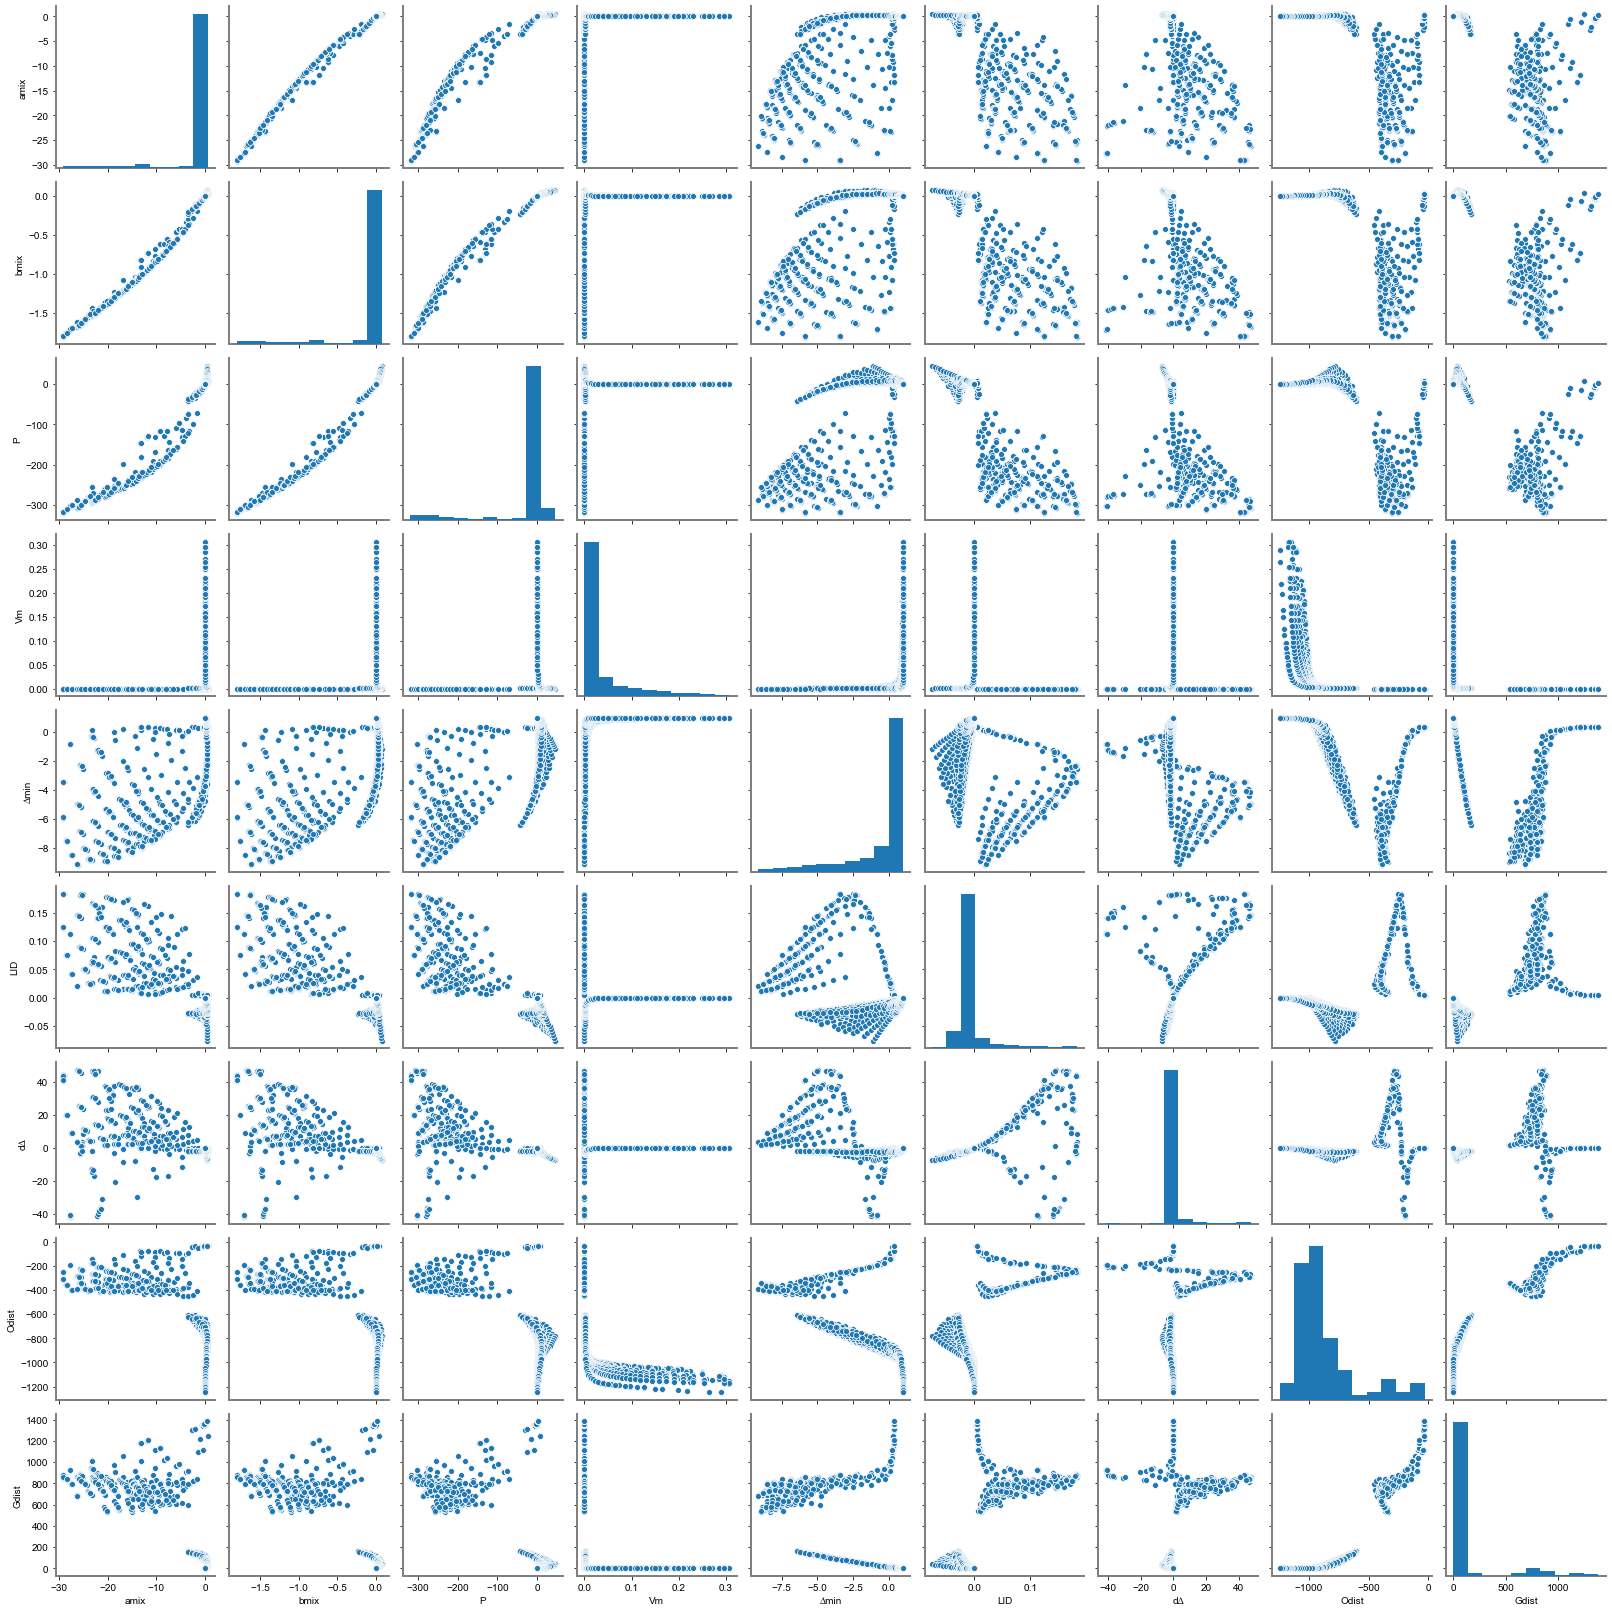

In [9]:
sns.pairplot(df,vars=['amix','bmix','P','Vm','∆min','LID','d∆','Odist','Gdist'],markers='o')
plt.tight_layout()
plt.savefig('visualization1.png',dpi=500)

We can see that there seem to be two clearly segregated behaviors with different correlations between the variables. The clearest indicator is the sign of LID (the liquid phase indicator). When the overall phase is liquid-like, LID>0.  When the overall phase is gas-like, LID<0. Therefore it makes sense that there would be two different sets of variable correlations for those two conditions. We then separate the two datasets and visualize them to ensure that the remaining data do not show two distinct clusters.

In [10]:
dfL=df.iloc[df['LID'].values<0,:]
dfV=df.iloc[df['LID'].values>0,:]

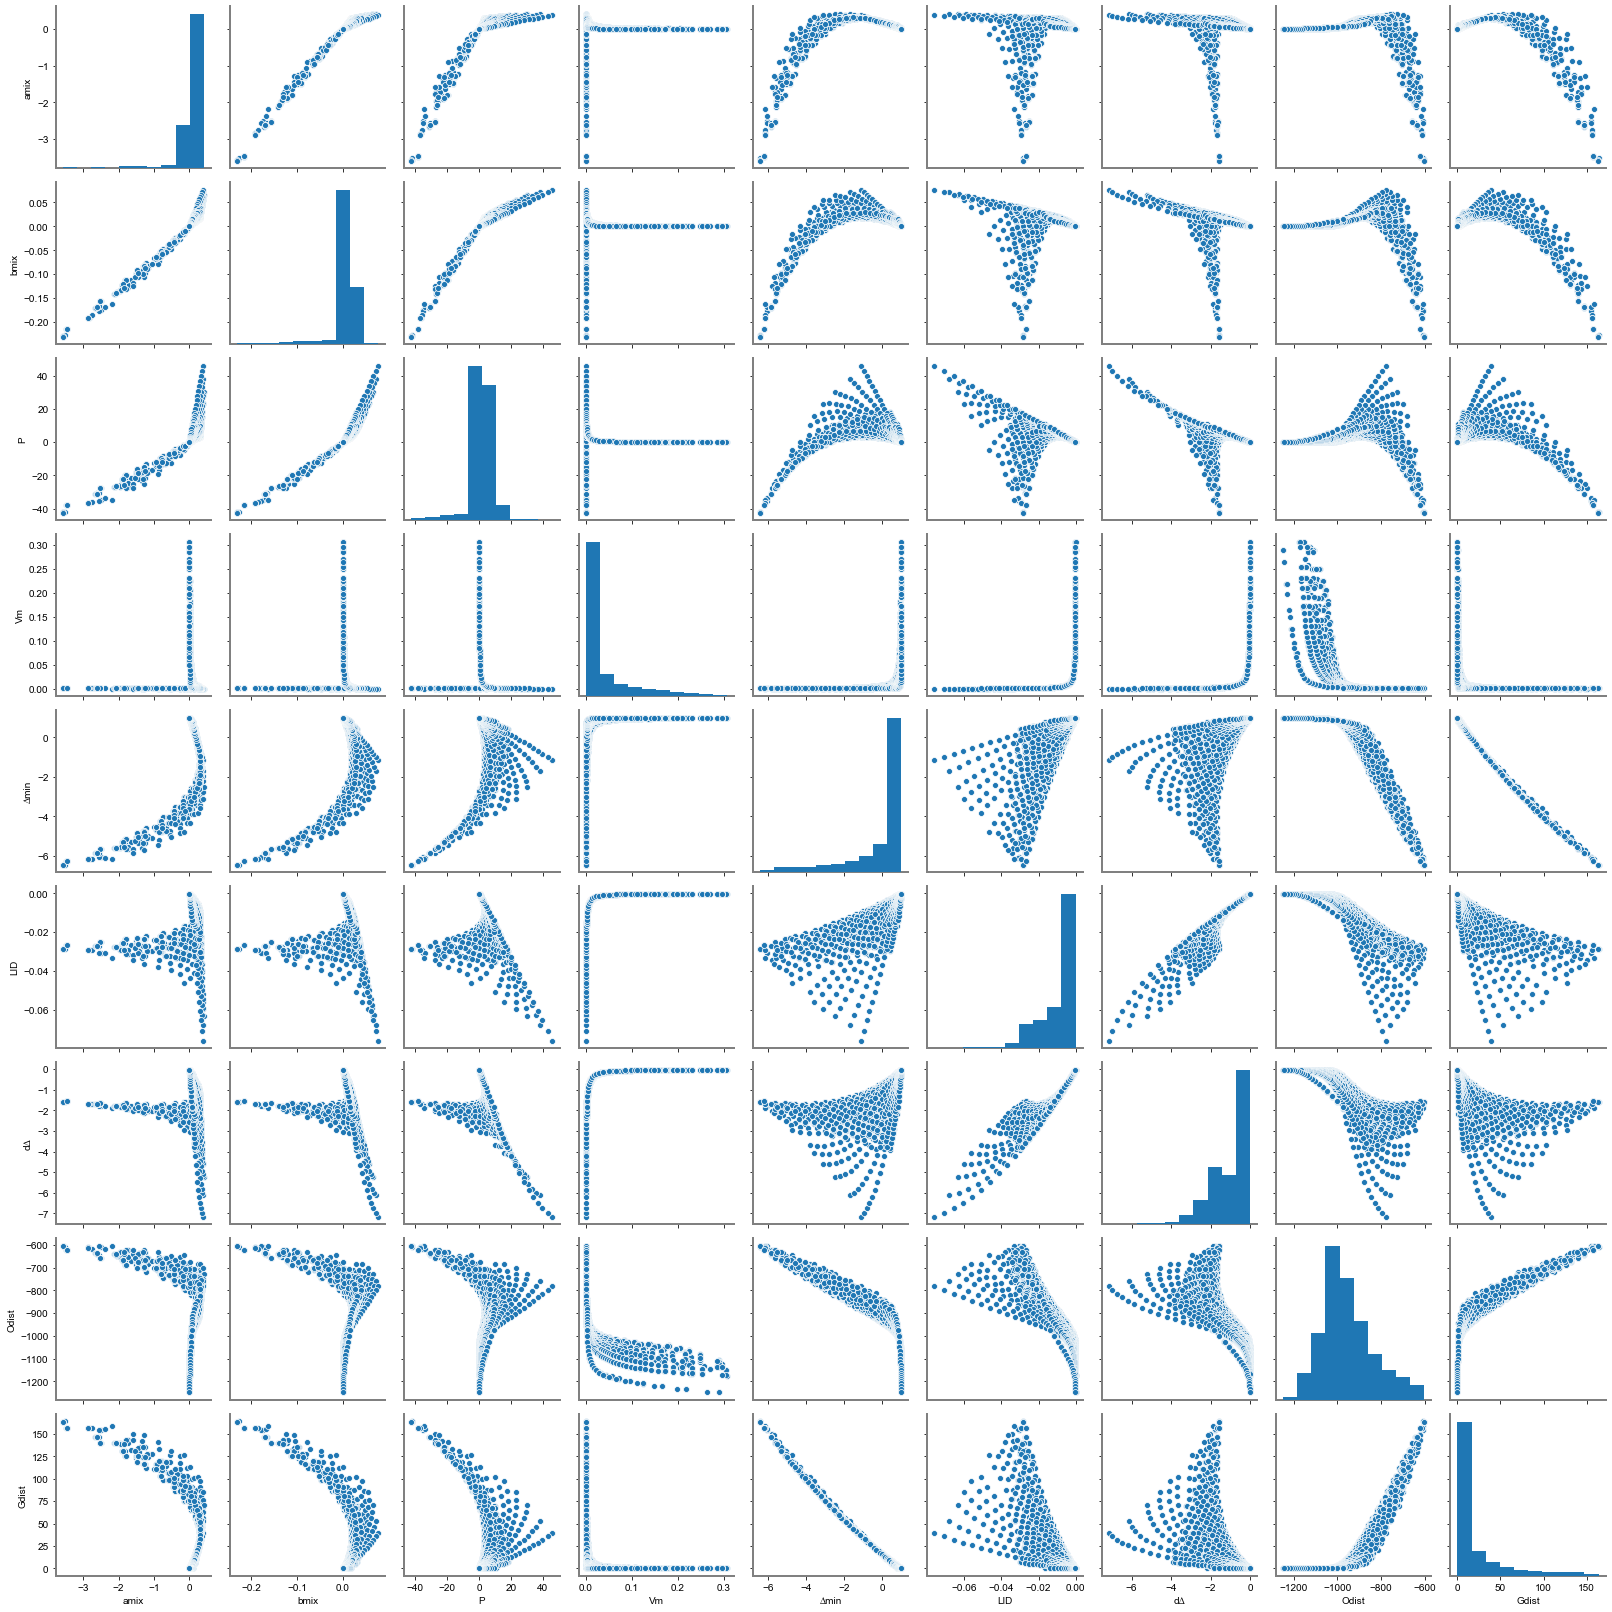

In [11]:
sns.pairplot(dfL,vars=['amix','bmix','P','Vm','∆min','LID','d∆','Odist','Gdist'],markers='o')
plt.tight_layout()
plt.savefig('visualization2L.png',dpi=500)

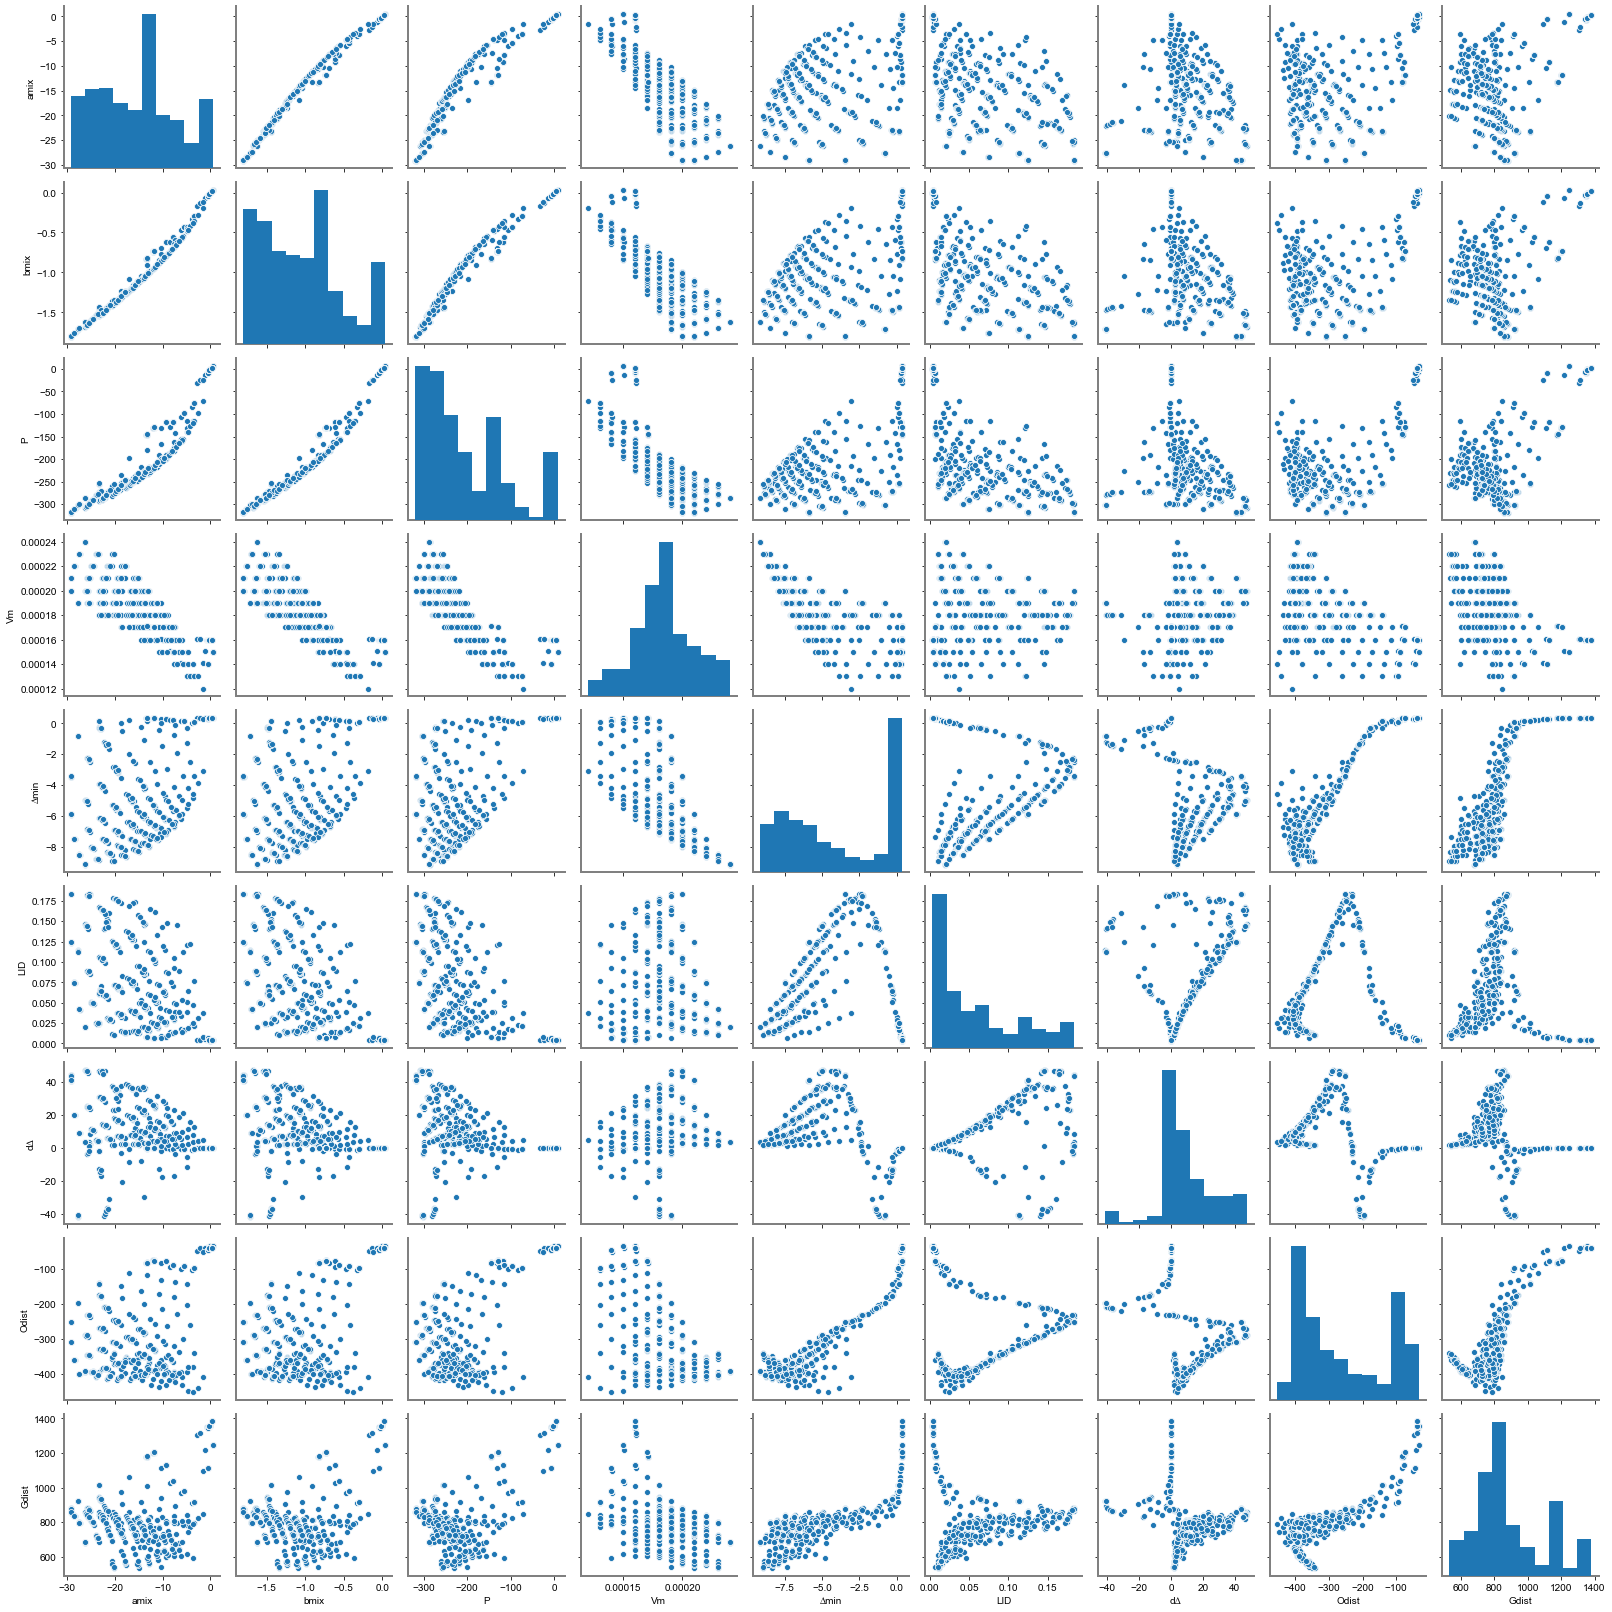

In [12]:
sns.pairplot(dfV,vars=['amix','bmix','P','Vm','∆min','LID','d∆','Odist','Gdist'],markers='o')
plt.tight_layout()
plt.savefig('visualization2V.png',dpi=500)

In order to keep this study concise, we will focus on modeling Odist and Gdist for the liquid phase only (LID>0).

In [13]:
df=dfL

And now we visualize the rest of the variables.

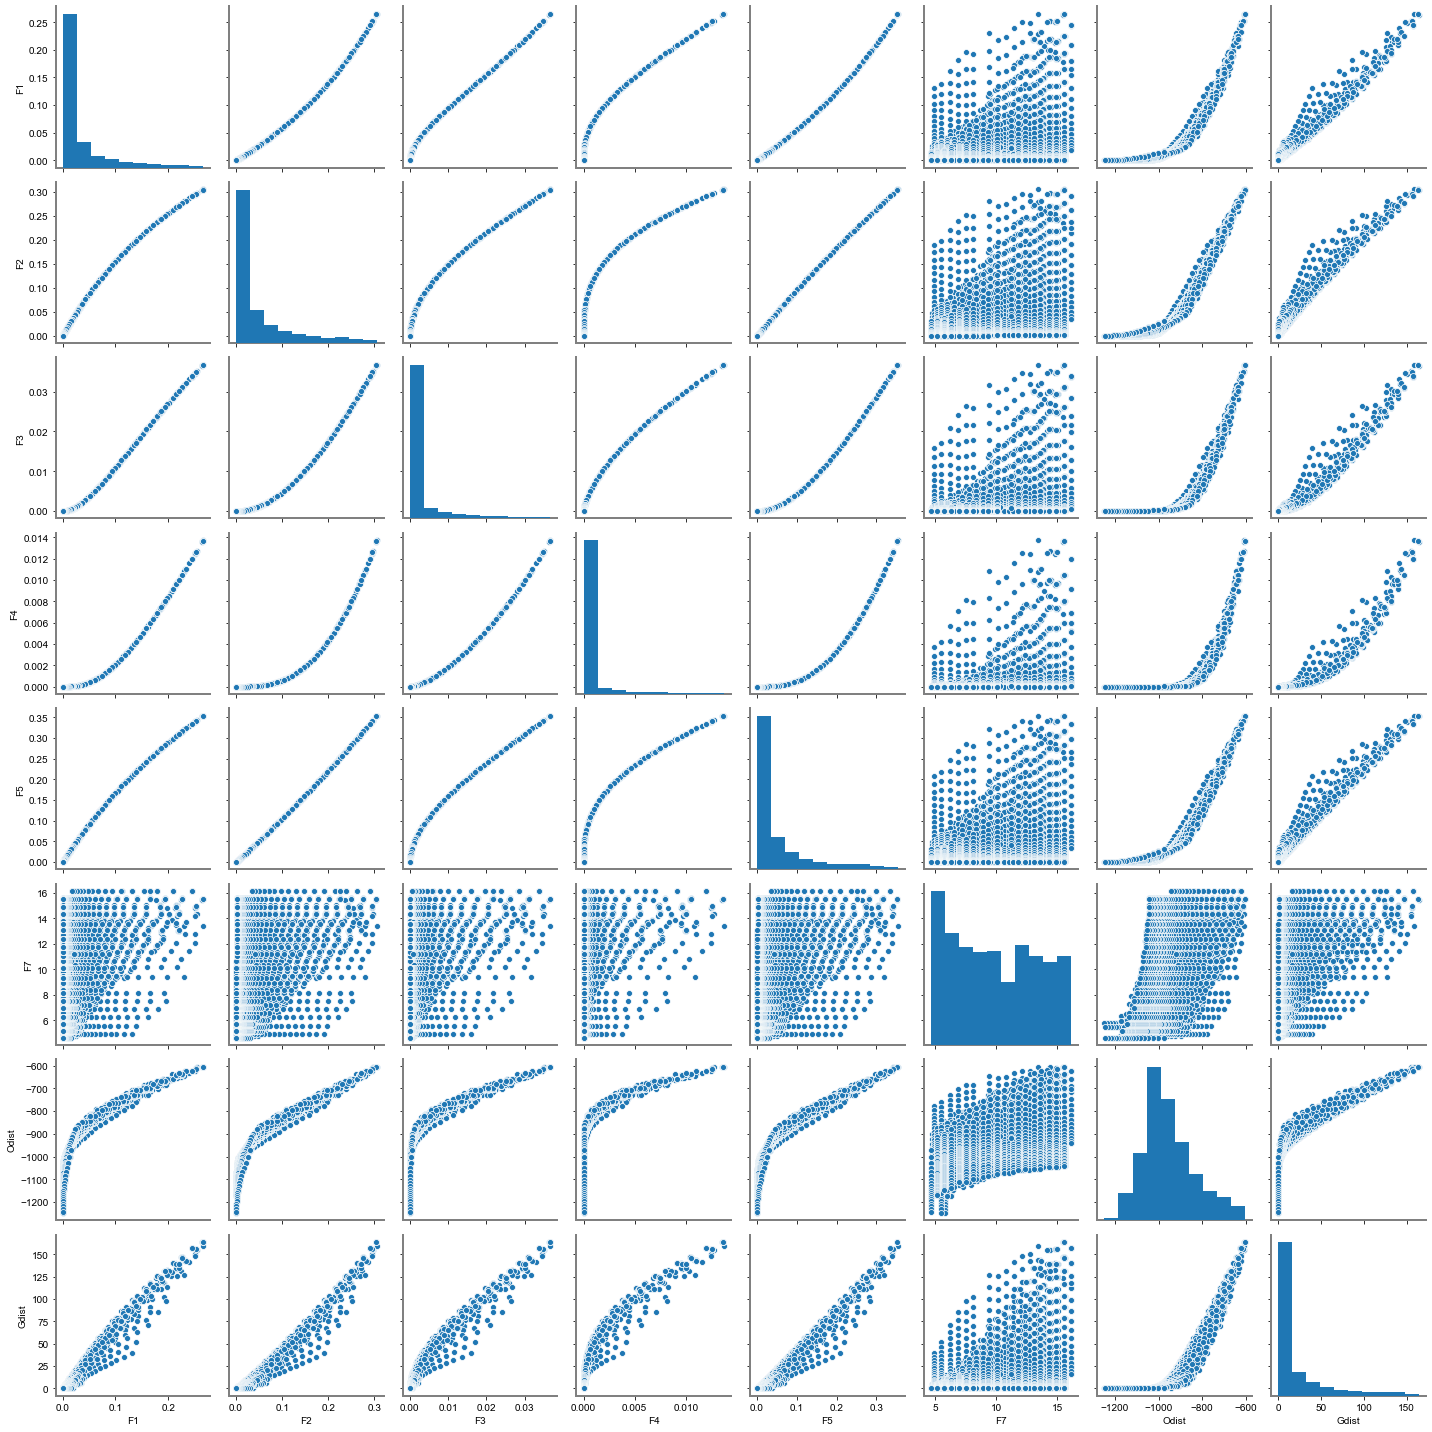

In [14]:
sns.pairplot(df,vars=['F1','F2','F3','F4','F5','F7','Odist','Gdist'],markers='o')
plt.tight_layout()
plt.savefig('visualization3.png',dpi=500)

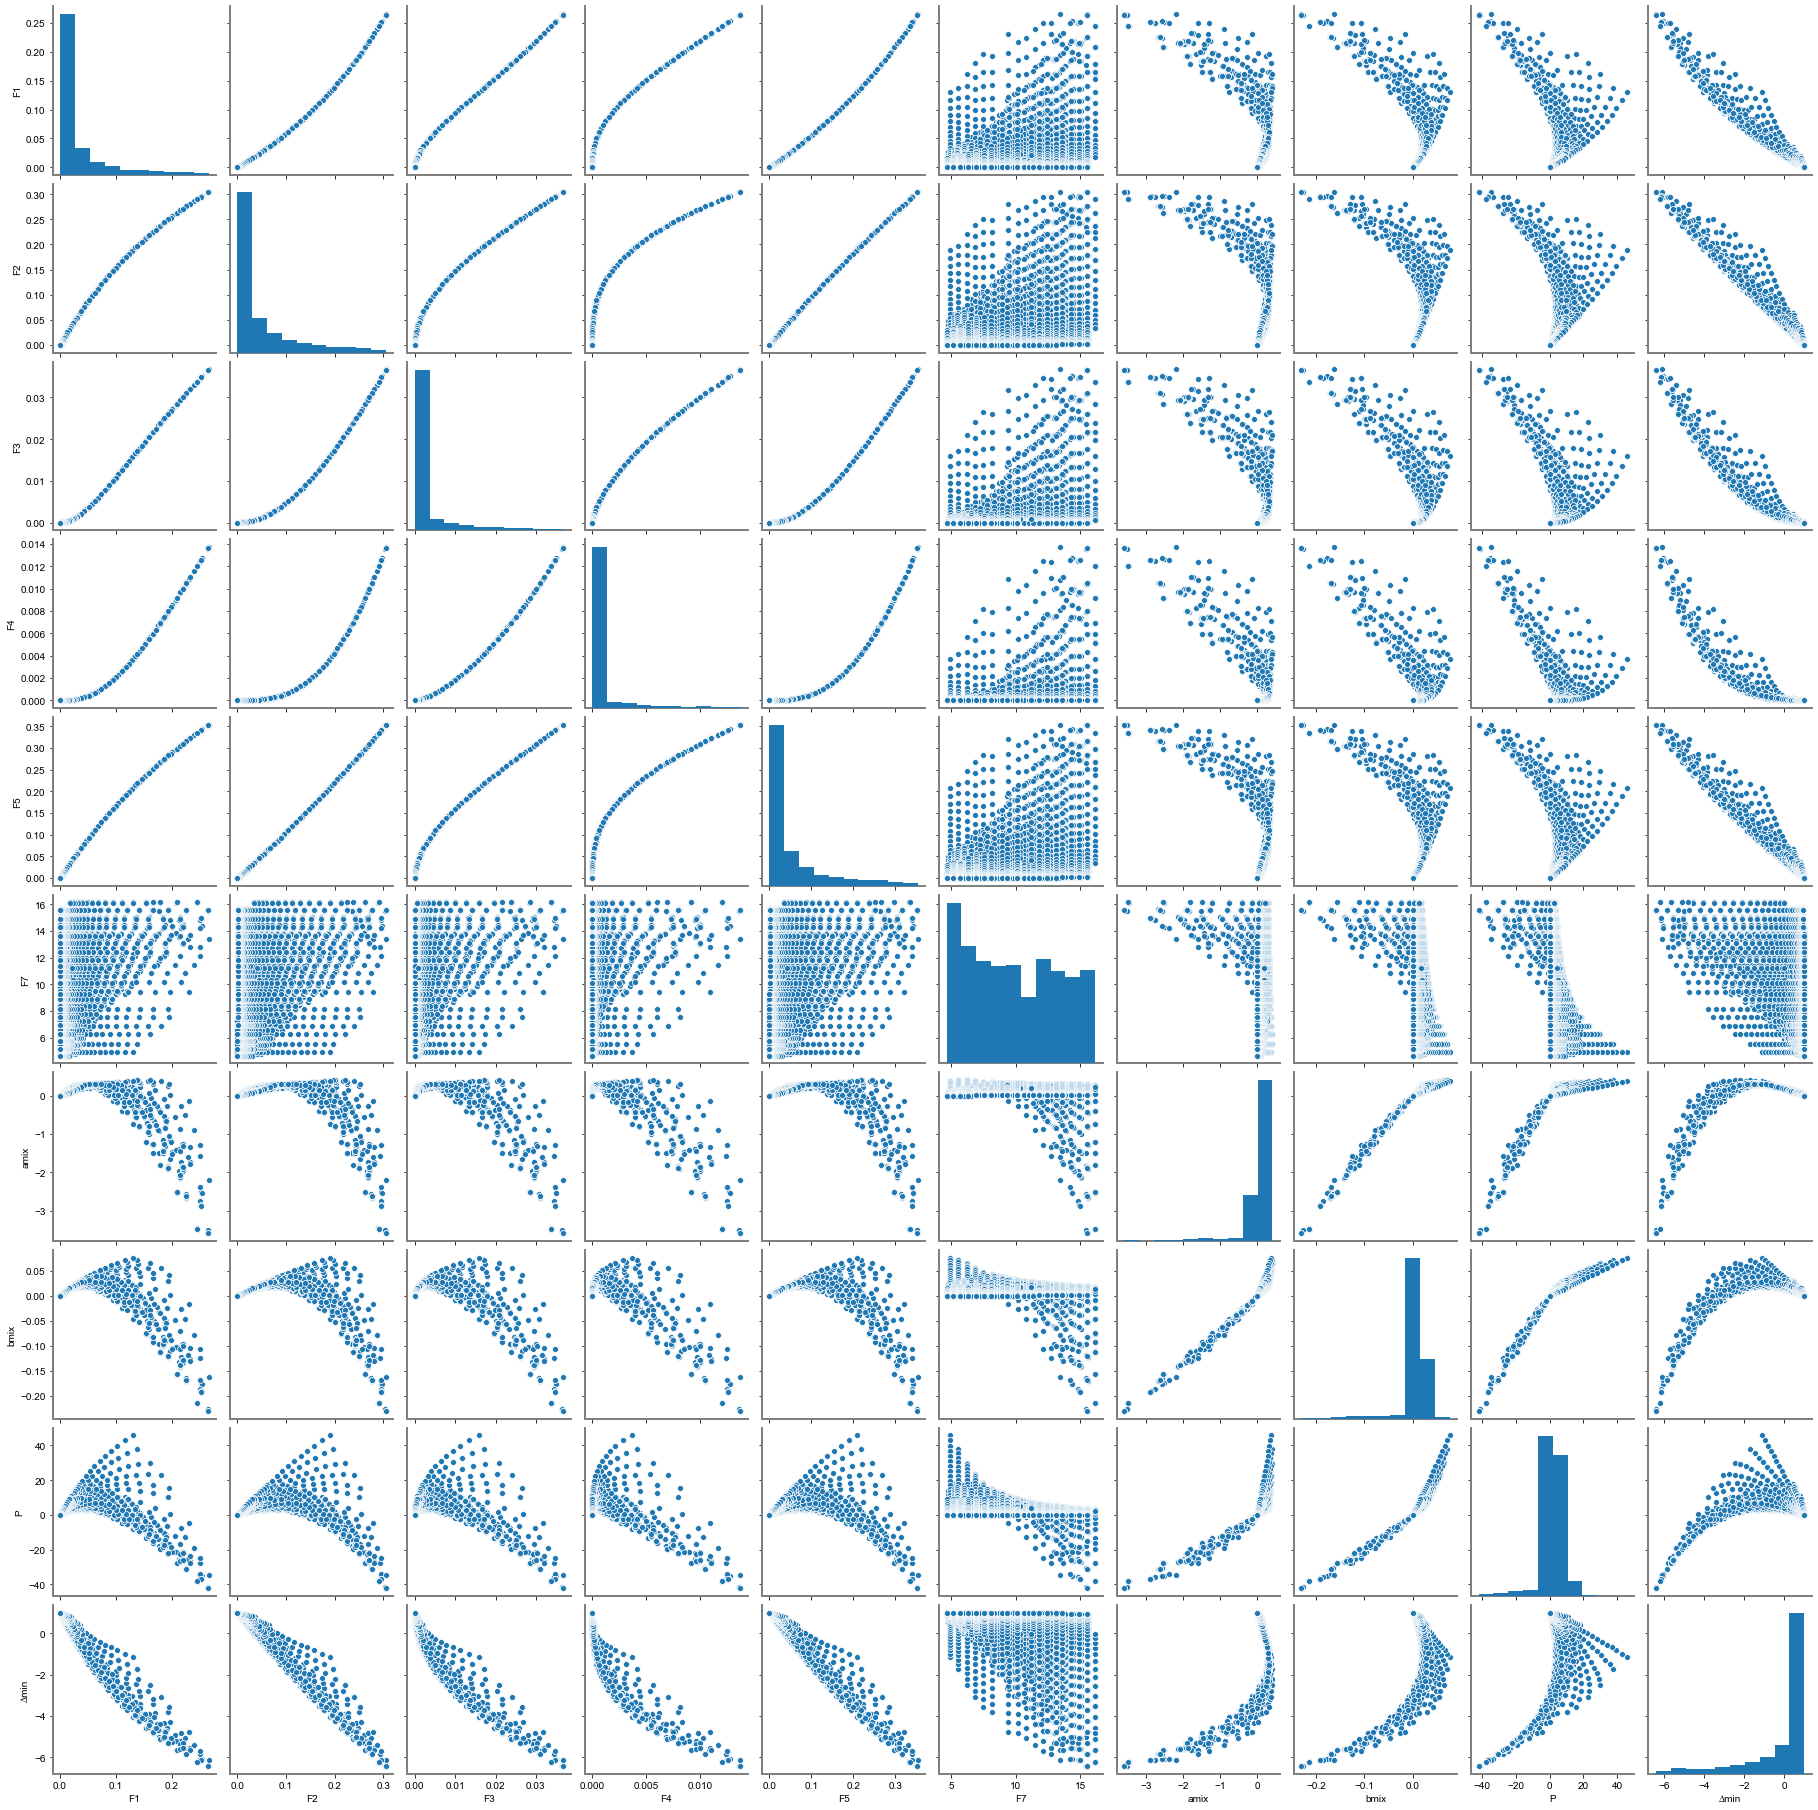

In [15]:
sns.pairplot(df,vars=['F1','F2','F3','F4','F5','F7','amix','bmix','P','∆min'],markers='o')

### Predictive correlation for flash calculation initial guesses for overall liquid phases

### 1. Feature ranking and selection

The dataset is not very large. That is why it is important to determine which features are the most important. This is done using feature ranking. For both predictor features, we first calculate the 
- mutual information coefficients 
- correlation coefficient
- rank correlation coefficient

#### 1.a. Mutual information
We begin with computing the MI for the predictor feature 

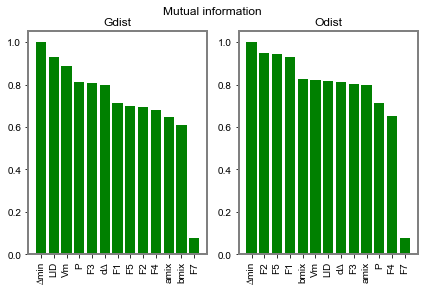

In [16]:
x = df.iloc[:,:-2]                               # Store the predictor features in a separate dataframe
yg = df.iloc[:,[-2]]                             # Store the Gdist separately
yo = df.iloc[:,[-1]]                             # Store the Odist separately

mig = mutual_info_regression(x,np.ravel(yg))     # calculate mutual information for Gdist
mio = mutual_info_regression(x,np.ravel(yo))     # calculate mutual information for Gdist

mio /= np.max(mio)                               # calculate relative mutual information
mig /= np.max(mig)                               # calculate relative mutual information

indiceso = np.argsort(mio)[::-1]                 # Sort mutual information in descending order
indicesg = np.argsort(mig)[::-1]                 # Sort mutual information in descending order

plt.subplot(121)                                 # Create a 1-by-2 subplot
plt.title("Gdist")                               # Add plot title to first subplot figure
plt.bar(range(x.shape[1]), mig[indicesg],
       color="g", align="center")                # Add bar plot to first subplot figure
plt.xticks(range(x.shape[1]), x.columns[indicesg],rotation=90) # Label the x-ticks with
plt.xlim([-1, x.shape[1]])                       # Set the x axis limits

plt.subplot(122)                                 # Plot the relative mutual information 
plt.title("Odist")                               # Add plot title to first subplot figure
plt.bar(range(x.shape[1]), mio[indiceso],
       color="g", align="center")                # Add bar plot to first subplot figure
plt.xticks(range(x.shape[1]), x.columns[indiceso],rotation=90) # Label the x-ticks with
plt.xlim([-1, x.shape[1]])                       # Set the x axis limits
plt.suptitle('Mutual information',y=1.0)         # Add plot suptitle to first subplot figure
plt.tight_layout()                               # Adjust borders of figure
plt.savefig('Mutualinf.png',dpi=500)             # save figure

The analysis above shows that the two predictor features differ in their mutual informations with the predictor features, however both show relativley high mutual information for all the proposed predictor features except for F7. This exception could potnetialy indicate a total lack of correlation with the response features.

#### 1.b. Correlation coefficients

In [17]:
correlation = df.corr().iloc[:-2,[-2,-1]]
rank_correlation, rank_correlation_pval = stats.spearmanr(df)        # Calculate the range correlation coefficient
rank_correlation = rank_correlation[:-2,-2:]                         # Keep only the correlation of predictor features with response features
partial_correlationo = partial_corr(df.drop(columns='Gdist'))        # Calculate the partial correlation coefficients for Gdist
partial_correlationg = partial_corr(df.drop(columns='Odist'))        # Calculate the partial correlation coefficients for Odist
partial_correlationo = partial_correlationo[:-1,-1]                  # Extract a single row and remove production with itself
partial_correlationg = partial_correlationg[:-1,-1]                  # Extract a single row and remove production with itself

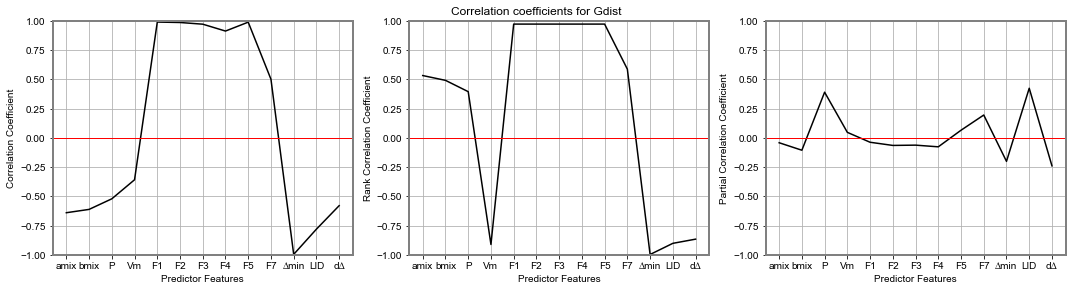

In [18]:
features = df.columns.values[:][:-2]                          # Create a list of features containing the column labels
plt.figure(figsize=(15,4))                                    # Initiate a figure with dimensions large enough to accomodate for 3 subplots
plt.subplot(131)                                              # Create a subplot at the right
plt.plot(features,correlation['Gdist'].values,color='black')  # Plot of the correlation factors

plt.axhline(y=0,color='red',linewidth = 1.0) # plot a red horizontal line at y=0 for reference
plt.xlabel('Predictor Features')                              # Label for x axis
plt.ylabel('Correlation Coefficient')                         # Label for y axis
plt.ylim(-1,1)                                                # Limits for the y axis of correlation cofficients
plt.grid(True)                                                # Activate gird

plt.subplot(132)                                              # Create a subplot in the middle
plt.plot(features,rank_correlation[:,0],color='black')        # Plot of the correlation factors
plt.axhline(y=0,color='red',linewidth = 1.0) # plot a red horizontal line at y=0 for reference
plt.xlabel('Predictor Features')                              # Label for x axis
plt.ylabel('Rank Correlation Coefficient')                    # Label for y axis
plt.ylim(-1,1)                                                # Limits for the y axis of correlation cofficients
plt.grid(True)                                                # Activate gird

plt.subplot(133)                                              # Create a subplot in the middle
plt.plot(features,partial_correlationg,color='black')         # plot of the correlation factors
plt.axhline(y=0,color='red',linewidth = 1.0) # plot a red horizontal line at y=0 for reference
plt.xlabel('Predictor Features')                              # label for x axis
plt.ylabel('Partial Correlation Coefficient')                 # label for y axis
plt.ylim(-1,1)                                                # limits for the y axis of correlation cofficients
plt.grid(True)                                                # Activate gird
plt.suptitle('Correlation coefficients for Gdist',x=0.5,y=1.0,fontsize=12) # Add a suptitle
plt.tight_layout()
plt.savefig('Gdist_correl.png',dpi=500)

The following observations can be made based on the comparison between the correlations above for the predictor feature with Gdist:

- The partial correlation coefficients are all near zero. This indicates that very little variability is left when a simple linear correlation is used.

- ∆min, F1, F2, F3, F4, F5 appears to be strongly linearly correlated with Gdist.

- bmix, amix, and P are relatively less strongly correlated with Gdist, and this correlation is strongly non-linear since the correlation coefficients and rank correlation coefficients have different signs.

- F7, LID, and d∆ are correlated with Gdist. The rank correlation coefficient has a higher magnitude than the correlation coefficient, therefore, we can infer a slightly non-linear correlation with Gdist  . 

- Low partial correlation coefficients could also be caused by a high-degree of multi-collinearity which is confirmed by the visual inspection of the matrix scatter plot.

Conclusion/Action items:

- Gdist is linearly correlated with most predictor features. A linear model will be used to model it.

- Vm, F7, LID, and d∆ are non-linearly correlated with Gdist and therefore will not be used in fitting using a linear model.

- PCA will be performed to determine the multicollinarities and reduce the dimensionality of the problem. This is also necessary

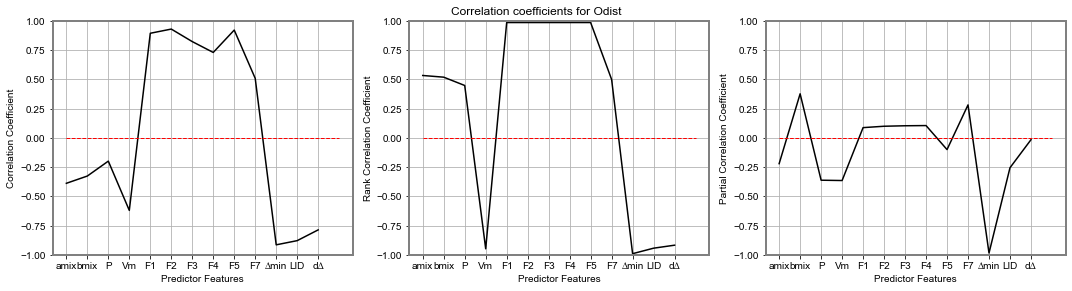

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.plot(features,correlation['Odist'].values,color='black') # plot of the correlation factors
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0) # plot a red horizontal line at y=0 for reference
plt.xlabel('Predictor Features')                              # label for x axis
plt.ylabel('Correlation Coefficient')                         # label for y axis
plt.ylim(-1,1)                                                # limits for the y axis of correlation cofficients
plt.grid(True)

plt.subplot(132)
plt.plot(features,rank_correlation[:,1],color='black')        # plot of the correlation factors
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0) # plot a red horizontal line at y=0 for reference
plt.xlabel('Predictor Features')                              # label for x axis
plt.ylabel('Rank Correlation Coefficient')                    # label for y axis
plt.ylim(-1,1)                                                # limits for the y axis of correlation cofficients
plt.grid(True)

plt.subplot(133)
plt.plot(features,partial_correlationo,color='black')         # plot of the correlation factors
plt.plot([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],'r--',color='red',linewidth = 1.0) # plot a red horizontal line at y=0 for reference
plt.xlabel('Predictor Features')                              # label for x axis
plt.ylabel('Partial Correlation Coefficient')                 # label for y axis
plt.ylim(-1,1)                                                # limits for the y axis of correlation cofficients
plt.grid(True)
plt.suptitle('Correlation coefficients for Odist',x=0.5,y=1.0)
plt.tight_layout()
plt.savefig('Odist_correl.png',dpi=500)

The following observations can be made based on the comparison between the correlations above for the predictor feature with Gdist:

- The partial correlation coefficients are all near zero except for ∆min, however with higher magnitude than for the Gdist response features variable. This indicates that multi-collinearity is likely present in the variable space for every variable except for ∆min. This also indicates a more non-linear correlation of the variable Odist than Gdist.
 
- ∆min, F1, F2, F3, F4, F5 appears to be strongly correlated with Odist. This correlation is slightly non-linear as shown by the higher value for the rank correlation coefficients than the correlation coefficient.

- bmix, amix, and P are relatively less strongly correlated with Odist, and this correlation is strongly non-linear since the correlation coefficients and rank correlation coefficients have different signs.

- F7, LID, and d∆ are correlated with Odist. The rank correlation coefficient have a higher magnitude than the correlation coefficient, therefore, we can infer a slightly non-linear correlation with Odist. 

- Low partial correlation coefficients could also be caused by a high-degree of multi-collinearity which is confirmed by the visual inspection of the matrix scatter plot.

Conclusion/Action items:

- Odist is non-linearly correlated with the predictor features. A polynomial model will be used to fit the data. 

- F7 is very weakly correlated with Gdist and therefore will not be used in fitting using a polynomial model.

- PCA will be performed to determine the multi-collinarities and reduce the dimensionality of the problem.

In [20]:
df_selected=df.drop(columns='F7') # We remove the unimportant variable F7

### 2. Dimensionality reduction

The current variables that have been selected to build the model have been selected based on impact, but have not been filtered for redundance.  By occular inspection we can already see that the variables F1 through F5 are non-linearly highly correlated and are therefore redundant.  In order to make the model more interpretable, it would be best to eliminate this redundancy from the dataset. Dimensionality reduction through Principal Component Analysis (PCA)will be used to accomplish that goal.
<br>
<br>
Let us now analyze whether our selected predictor features have any multicollinearities. We can do that by visualizing the correlation matrix using the heatmap function of seaborn.

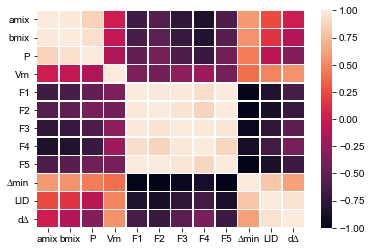

In [21]:
sns.heatmap(df_selected.iloc[:,:-2].corr(),vmin = -1.0, vmax = 1.0,linewidths=.5, fmt= '.1f')
# plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

We can see that the correlation matrix above agrees with the occular inspection for the multicollinearity between the groups of variables {F1,F2,F3,F4,F5}, {amix,bmix,P}, and {LID,d∆}. Though the third group looks highly correlated with the first, the feature ranking with Gdist tells us that these two groups of variables are correlated with Gdist in drastically different ways.
We start with the PCA on the first group.

In [22]:
df_dimred=pd.DataFrame()                                 # Create a new dataframe that will contain the dataset after dimensionality reduction
features = ['∆min','Vm','Odist','Gdist']                 # This is the list of variables on which dimensionality reduction is not applied
x = df_selected.loc[:,features].values                    # Convert dataframe columns to nd array
mu = np.mean(x, axis=0)                                   # Compute the mean of the preserved variables
sd = np.std(x, axis=0)                                    # Compute the standard deviation of the preserved variables
x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0
df_dimred[features[0]]=x[:,0]                             # Store the standardized ∆min
df_dimred[features[1]]=x[:,1]                             # Store the standardized Vm
df_dimred[features[2]]=x[:,2]                             # Store the standardized Odist
df_dimred[features[3]]=x[:,3]                             # Store the standardized Gdist


features = ['F1','F2','F3','F4','F5']                     # First group of variables to apply dimensionality reduction on
x = df_selected.loc[:,features].values                    # Convert dataframe columns to nd array
muF = np.mean(x, axis=0)                                  # Compute the mean of the features to be reduced  
sdF = np.std(x, axis=0)                                   # Compute the standard deviation of the features to be reduced
x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

n_components = 5                                                                      
pcaF = PCA(n_components=n_components)                     # Initialize a PCA model              
pcaF.fit(x)                                               # Fit the PCA model to the data
x_trans = pcaF.transform(x)                               # Apply the PCA tranform on the data

print('Variance explained by the principal components =', np.round(pcaF.explained_variance_ratio_,n_components)) 

Variance explained by the principal components = [9.6702e-01 3.2300e-02 6.8000e-04 0.0000e+00 0.0000e+00]


Only two principal components are necessary to describe the great majority of the variance. Consequently, we will use the principal component scores for the first two principal components as pseudo variables in the predictive correlations.
The next step is PCA for the second group of variables {amix,bmix,P}

In [23]:
df_dimred['PCF1']=x_trans[:,0]                            # Store the first principal component scores in the new dataframe

features = ['amix','bmix','P']                            # Second group of variables to apply dimensionality reduction on
x = df_selected.loc[:,features].values                    # Convert dataframe columns to nd array
muA = np.mean(x, axis=0)                                  # Compute the mean of the features to be reduced  
sdA = np.std(x, axis=0)                                   # Compute the standard deviation of the features to be reduced
x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0                     # standardize the data features to mean = 0, var = 1.0

n_components = 3
pcaA = PCA(n_components=n_components)                     # Initialize a PCA model              
pcaA.fit(x)                                               # Fit the PCA model to the data
x_trans = pcaA.transform(x)                               # Apply the PCA tranform on the data

print('Variance explained by the principal components =', np.round(pcaA.explained_variance_ratio_,n_components)) 

Variance explained by the principal components = [0.956 0.043 0.   ]


Only two principal components are necessary to describe the great majority of the variance. Consequently, we will use the principal component scores for the first two principal components as pseudo variables in the predictive correlations.
The next step is PCA for the second group of variables {LID,d∆}

In [24]:
df_dimred['PCA1']=x_trans[:,0]                            # Store the first principal component scores in the new dataframe

features = ['LID','d∆']                                   # Third group of variables to apply dimensionality reduction on
x = df_selected.loc[:,features].values                    # Convert dataframe columns to nd array
muL = np.mean(x, axis=0)                                  # Compute the mean of the features to be reduced  
sdL = np.std(x, axis=0)                                   # Compute the standard deviation of the features to be reduced
x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

n_components = 2
pcaL = PCA(n_components=n_components)                     # Initialize a PCA model              
pcaL.fit(x)                                               # Fit the PCA model to the data
x_trans = pcaL.transform(x)                               # Apply the PCA tranform on the data

print('Variance explained by the principal components =', np.round(pcaL.explained_variance_ratio_,n_components))

Variance explained by the principal components = [0.97 0.03]


Only one principal component is necessary to describe the great majority of the variance. Consequently, we will use the principal component scores for the first principal components as pseudo variable in the predictive correlations.

In [25]:
df_dimred['PCL1']=x_trans[:,0]

df_dimred=df_dimred[['PCF1','PCA1','PCL1','Vm','∆min','Odist','Gdist']]
dfo=df_dimred.drop(columns=['Gdist'])

dfg=df_dimred.drop(columns=['PCL1','Vm','Odist'])

dfg.describe()

PCF1          PCA1          ∆min         Gdist
count  4.255000e+03  4.255000e+03  4.255000e+03  4.255000e+03
mean  -9.763700e-17  1.604018e-17 -3.397204e-17  8.623471e-17
std    2.199142e+00  1.694086e+00  1.000118e+00  1.000118e+00
min   -1.258138e+00 -5.493158e+00 -3.817640e+00 -6.137245e-01
25%   -1.206405e+00 -6.894036e-01 -2.120746e-01 -5.893873e-01
50%   -9.678239e-01 -5.507679e-02  4.867630e-01 -4.788278e-01
75%    3.150254e-03  1.672687e-01  6.399414e-01  1.044819e-01
max    1.074177e+01  1.291030e+01  6.774969e-01  4.276722e+00

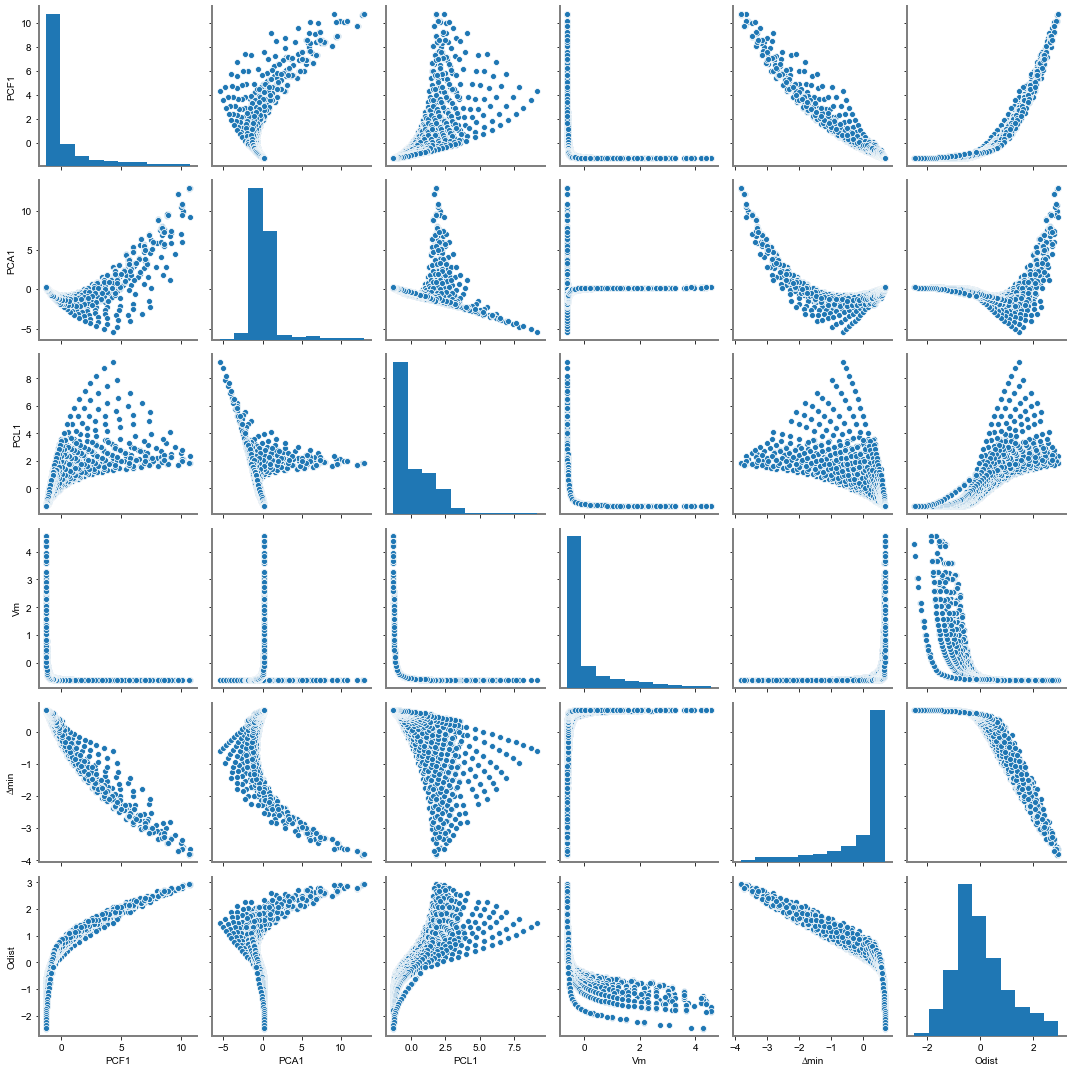

In [26]:
sns.pairplot(df_dimred,vars=['PCF1','PCA1','PCL1','Vm','∆min','Odist'],markers='o')
plt.tight_layout()
plt.savefig('visualization4.png',dpi=500)

### 3. Train/test data splitting
We split the training and testing data using random mutually exclusive samples of 20% of the data for testing and 80% for training.

In [27]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(dfo.iloc[:,:-1], dfo.iloc[:,-1].values, test_size=0.2, random_state=10)
Xg_train, Xg_test, yg_train, yg_test = train_test_split(dfg.iloc[:,:-1], dfg.iloc[:,-1].values, test_size=0.2, random_state=45)

In [28]:
Xo_train.describe()
# dfo.describe()

PCF1         PCA1         PCL1           Vm         ∆min
count  3404.000000  3404.000000  3404.000000  3404.000000  3404.000000
mean      0.021028     0.005538     0.012948    -0.007699    -0.011072
std       2.212242     1.712931     1.402422     0.992095     1.008320
min      -1.258138    -5.493158    -1.310280    -0.626572    -3.817640
25%      -1.204721    -0.688336    -1.161482    -0.592143    -0.235280
50%      -0.964407    -0.055044    -0.542513    -0.485804     0.482868
75%       0.049945     0.168562     0.988188     0.113735     0.639277
max      10.702473    12.910298     9.201701     4.568467     0.677497

In [29]:
Xg_train.describe()

PCF1         PCA1         ∆min
count  3404.000000  3404.000000  3404.000000
mean     -0.021540    -0.011486     0.008591
std       2.168334     1.683789     0.988947
min      -1.258138    -5.114991    -3.817640
25%      -1.206725    -0.695486    -0.198953
50%      -0.967285    -0.069515     0.485007
75%      -0.014009     0.167812     0.640423
max      10.741774    12.910298     0.677497

### 4. Linear modeling for Gdist

variance explained is = 0.9995501639061246


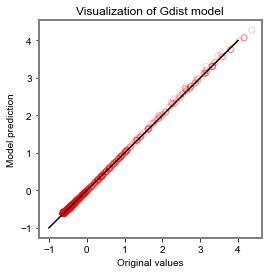

In [30]:
lin = LinearRegression()                            # Initiate a linear regression scikit learn object
lin.fit(Xg_train, yg_train)                         # Use linear regression to compute the coefficient for each polynomial order
y_pred=lin.predict(Xg_test)                         # Use the correlation to predict the Odist using the polynomial correlation
plt.figure(figsize=(4,4))                           # Create a pyplot figure object
plt.scatter(y_pred,yg_test,facecolors='none',edgecolors='r',alpha=0.2) # Add a scatter plot on the figure
plt.plot([-1.,4.],[-1.,4.],'k-')                    # Plot a line y = x for comparison against the model 
plt.xlabel('Original values');plt.ylabel('Model prediction');plt.title('Visualization of Gdist model'); # Add the x label, y label, and title
r2Gdist=metrics.r2_score(y_pred,yg_test)            # Compute the variance explained by the linear model
print('variance explained is = '+str(r2Gdist))

The linear model using two reduced variables and ∆min as predictor features produces explains more than 99.9% of the variance in testing. This is a very satisfying result. 
### 5. Build the final model for Gdist
The next step is to build the final model based on the entire dataset.

variance explained is = 0.9995916317931848


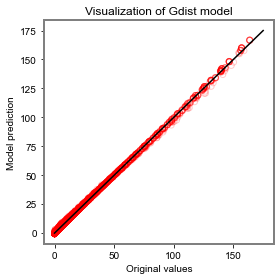

In [31]:
lin = LinearRegression()                            # Initiate a linear regression scikit learn object 
lin.fit(dfg.iloc[:,:-1], dfg['Gdist'].values)       # Use linear regression to compute the coefficient for each polynomial order
y_pred=lin.predict(dfg.iloc[:,:-1])*sd[3]+mu[3]     # Use the correlation to predict the Odist using the polynomial correlation
plt.figure(figsize=(4,4))                           # Create a pyplot figure object
plt.scatter(df['Gdist'].values,y_pred,facecolors='none',edgecolors='r',alpha=0.2) # Add a scatter plot on the figure
plt.plot([0,175],[0,175],'k-')                      # Plot a line y = x for comparison against the model 
plt.xlabel('Original values');plt.ylabel('Model prediction');plt.title('Visualization of Gdist model'); # Add the x label, y label, and title
plt.tight_layout()                                  # Adjust the figure edges
plt.savefig('Gdist_final.png',dpi=500)              # Save the figure as png
r2Gdist=metrics.r2_score(y_pred,df['Gdist'].values) # Compute the variance explained by the linear model
print('variance explained is = '+str(r2Gdist))

The goodness of fit is maintained when using the entire dataset. This is therefore the final model.

### 6. Hyper-parameter tuning for Odist
Orhogonal polynomials will be used to train a predictive correlation for Odist and Gdist. The functions used to evaluate those polynomials were provided at the beginning of this document and borrowed from Dr. Michael Pyrcz's workflow (https://github.com/GeostatsGuy/Machine_Learning/tree/master/Workflows). The polynomial orders being considered range from 1 to 10 for each predictor feature. This makes a total of 100,000 cases. The optimal hyperparameters will be chosen for the ones which generate the lowest MSE in testing. In order to make the run time shorter, the orders considered in the loop below range from 1 to 3 for all variables except for ∆min going from 1 to 10. This range contains the same minimum solution as the minimum error solution to the 100,000 cases.

In [32]:
Fcols=['F0th','F1st','F2nd','F3th','F4th','F5th','F6th','F7th','F8th','F9th','F10th','F11th','F12th','F13th',
       'F14th','F15th','F16th','F17th','F18th','F19th'] # Prepare the labels for the dataframe in which we 
Acols=['A0th','A1st','A2nd','A3th','A4th','A5th','A6th','A7th','A8th','A9th','A10th','A11th','A12th','A13th',
       'A14th','A15th','A16th','A17th','A18th','A19th'] # will store the values of the polynomials of 
Lcols=['L0th','L1st','L2nd','L3th','L4th','L5th','L6th','L7th','L8th','L9th','L10th','L11th','L12th','L13th',
       'L14th','L15th','L16th','L17th','L18th','L19th'] # transofrmations by degree for each variable.
Vcols=['V0th','V1st','V2nd','V3th','V4th','V5th','V6th','V7th','V8th','V9th','V10th','V11th','V12th','V13th',
       'V14th','V15th','V16th','V17th','V18th','V19th']
Dcols=['D0th','D1st','D2nd','D3th','D4th','D5th','D6th','D7th','D8th','D9th','D10th','D11th','D12th','D13th',
       'D14th','D15th','D16th','D17th','D18th','D19th']

MSE=[]                   # Create empty arrays to append the MSE for each hyperparameter,
r2=[]                    # Variance explained,
ordersF=[]               # and its corresponding polynomial order 
ordersA=[]               # for each variable
ordersL=[]
ordersV=[]
ordersD=[]

maxf=3                   # maximum order of the polynomial being considered for the variable PCF1
minf=1                   # minimum order of the polynomial being considered for the variable PCF1

maxa=3                   # maximum order of the polynomial being considered for the variable PCA1
mina=1                   # minimum order of the polynomial being considered for the variable PCA1

maxd=10                  # maximum order of the polynomial being considered for the variable ∆min
mind=1                   # minimum order of the polynomial being considered for the variable ∆min

maxv=3                   # maximum order of the polynomial being considered for the variable Vm
minv=1                   # minimum order of the polynomial being considered for the variable Vm

maxl=3                   # maximum order of the polynomial being considered for the variable PCL1
minl=1                   # minimum order of the polynomial being considered for the variable PCL1

totaln=(maxf-minf+1)*(maxa-mina+1)*(maxd-mind+1)*(maxv-minv+1)*(maxl-minl+1) # Compute total number of cases considered
iter=0                   # Initialize the iteration counter
passed20=False           # Prepare the Boolean variable to let the user know when 20% of the cases have been run
passed40=False           # Prepare the Boolean variable to let the user know when 40% of the cases have been run
passed60=False           # Prepare the Boolean variable to let the user know when 60% of the cases have been run
passed80=False           # Prepare the Boolean variable to let the user know when 80% of the cases have been run
passed90=False           # Prepare the Boolean variable to let the user know when 90% of the cases have been run
passed95=False           # Prepare the Boolean variable to let the user know when 95% of the cases have been run

print('Progress')
for d in [1]+list(range(mind,maxd)):
    for a in [1]+list(range(mina,maxa)):
        for v in [1]+list(range(minv,maxv)):
            for f in [1]+list(range(minf,maxf)):
                for l in [1]+list(range(minl,maxl)):
                    iter=iter+1                                              # Update iteration counter
                    if (not passed20) :                                      # Check if 20% of cases have been run
                        if (iter>int(0.2*totaln)):
                            print('20%')
                            passed20=True
                    if (not passed40) :                                      # Check if 40% of cases have been run
                        if (iter>int(0.4*totaln)):
                            print('40%')
                            passed40=True                    
                    if (not passed60) :                                      # Check if 60% of cases have been run
                        if (iter>int(0.6*totaln)):
                            print('60%')
                            passed60=True                    
                    if (not passed80) :                                      # Check if 80% of cases have been run
                        if (iter>int(0.8*totaln)):
                            print('80%')
                            passed80=True 
                    if (not passed90) :                                      # Check if 90% of cases have been run
                        if (iter>int(0.9*totaln)):
                            print('90%')
                            passed90=True         
                    if (not passed95) :                                      # Check if 95% of cases have been run
                        if (iter>int(0.95*totaln)):
                            print('95%')
                            passed95=True                         

                    ordersF.append(f)                                        # store the polynomial order for each regression
                    ordersA.append(a)
                    ordersV.append(v)
                    ordersL.append(l)
                    ordersD.append(d)

                    df_inputs_ns_orthog=pd.DataFrame();                      # Create empty datafram to later store all the polynomial transformations used for fitting the correlations


                    X, norm2F, alphaF = ortho_poly_fit(Xo_train['PCF1'].values.reshape(-1, 1), degree = f) # Compute the polynomial transformations for F2
                    for ii in range(f+1):
                        df_inputs_ns_orthog[Fcols[ii]]=X[:,ii]               # store the F2 polynomial transform for each order in the training dataframe

                    X, norm2A, alphaA = ortho_poly_fit(Xo_train['PCA1'].values.reshape(-1, 1), degree = a) # Compute the polynomial transformations for amix
                    for ii in range(a+1):
                        df_inputs_ns_orthog[Acols[ii]]=X[:,ii]               # store the amix polynomial transform for each order in the training dataframe

                    X, norm2V, alphaV = ortho_poly_fit(Xo_train['Vm'].values.reshape(-1, 1), degree = v) # Compute the polynomial transformations for bmix
                    for ii in range(v+1):
                        df_inputs_ns_orthog[Vcols[ii]]=X[:,ii]               # store the bmix polynomial transform for each order in the training dataframe

                    X, norm2L, alphaL = ortho_poly_fit(Xo_train['PCL1'].values.reshape(-1, 1), degree = l) # Compute the polynomial transformations for bmix
                    for ii in range(l+1):
                        df_inputs_ns_orthog[Lcols[ii]]=X[:,ii]               # store the bmix polynomial transform for each order in the training dataframe                        
                        
                    X, norm2D, alphaD = ortho_poly_fit(Xo_train['∆min'].values.reshape(-1, 1), degree = d)# Compute the polynomial transformations for ∆min 
                    for ii in range(d+1):
                        df_inputs_ns_orthog[Dcols[ii]]=X[:,ii]               # store the ∆min polynomial transform for each order in the training dataframe                         

                    lin_orth = LinearRegression() 
                    lin_orth.fit(df_inputs_ns_orthog, yo_train)              # Use linear regression to compute the coefficient for each polynomial order

                    orth=np.concatenate((ortho_poly_predict(Xo_test['PCF1'].values, alphaF, norm2F, degree = f),
                                        ortho_poly_predict(Xo_test['PCA1'].values, alphaA, norm2A, degree = a),
                                        ortho_poly_predict(Xo_test['PCL1'].values, alphaL, norm2L, degree = l),
                                        ortho_poly_predict(Xo_test['Vm'].values, alphaV, norm2V, degree = v),
                                        ortho_poly_predict(Xo_test['∆min'].values, alphaD, norm2D, degree = d)),axis=1) # Concatenate the testing data into one numpy array                    
                    y_pred=lin_orth.predict(orth)                            # Use the correlation to predict the Odist using the polynomial correlation
                    MSE.append(metrics.mean_squared_error(y_pred,yo_test))   # Compute the MSE
                    r2.append(metrics.r2_score(y_pred,yo_test))



Progress
20%
40%
60%
80%
90%
95%


In [33]:
print('Optimal polynomial model : ')
print('   MSE = ',min(MSE))                  # print the minimum value of the MSE for polynomial model
print('   r2  = ',max(r2))                   # print the minimum value of the variance explained or polynomial model
indx=np.where(MSE==min(MSE))[0][0]           # Determine the index of the hyperparameter arrays corresponding to the minimum MSE
print('   Index of the minimum MSE',indx)    # Comptue the index of the hyperparameter arrays corresponding to the minimum MSE
print('   Total number of hyperpearameters considered = ',len(MSE))
print('   Variables       : ∆min PCF1 PCA1 PCL1 Vm')
print('   Polynomial order: '+str(ordersD[indx])+'    '+str(ordersF[indx])+'    '+str(ordersA[indx])+'    '+str(ordersL[indx])+'    '+str(ordersV[indx])+'\n')

print('Linear model : ')
print('   MSE = ',MSE[0])                    # print the minimum value of the MSE for linear model
print('   r2  = ',r2[0])                     # print the minimum value of the variance explained for linear model
# indx=0

Optimal polynomial model : 
   MSE =  0.026039517983321925
   r2  =  0.9718818189043149
   Index of the minimum MSE 809
   Total number of hyperpearameters considered =  810
   Variables       : ∆min PCF1 PCA1 PCL1 Vm
   Polynomial order: 9    2    2    2    2

Linear model : 
   MSE =  0.9581688962940152
   r2  =  -2.8399923715048985


The output of the code above shows that the variance explained by the linear model is negative indicating that as predicted, the linear model is not appropriate to model the variable Odist. The optimal hyperparameters that yield the lowest mean-squared error are polynomial orders of 9, 2, 2, 2, and 2 for the variables ∆min, PCF1, PCA1, PCL1, and Vm.<br>
We can visualize the data fit by computing an approximate measure of complexity using the sum of the polynomial order hyperparameters for each variable. If our polynomial model can be written as
\begin{equation}
Y=\sum_{\alpha=1}^{N_X}\sum_{j=1}^{N_{p\alpha}}\beta_{\alpha j}P(X_{\alpha},j)
\end{equation}
where $P(X_{\alpha},j)$ is the evaluation of the jth order of a polynomial. The complexity is evaluated as
\begin{equation}
C=\sum_{\alpha=1}^{N_X}N_{p\alpha}
\end{equation}

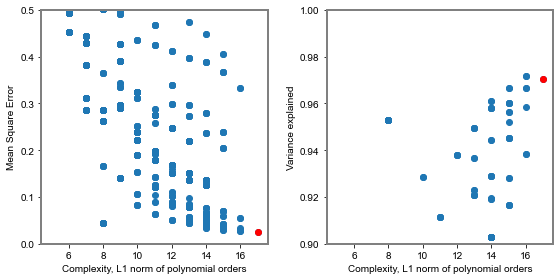

In [34]:
complexity=np.array(ordersD)+np.array(ordersA)+np.array(ordersL)+np.array(ordersF)+np.array(ordersV) # To estimate a complexity indicator value
plt.figure(figsize=(8,4))                                     # Create a pyplot figure
plt.subplot(121)                                              # Create a subplot for the testing MSE
plt.scatter(complexity,MSE)                                   # Plot the MSE for each case
plt.scatter([complexity[indx]],[MSE[indx]],facecolor='r')     # Mark the MSE for the selected optimal case in red
plt.xlabel('Complexity, L1 norm of polynomial orders')        # x axis label
plt.ylabel('Mean Square Error')                               # y axis label
plt.ylim((0.,0.5))                                            # set limits to the y axis

plt.subplot(122)
plt.scatter(complexity,r2)                                    # Plot the variance explained for each case
plt.scatter([complexity[indx]],[r2[indx]],facecolor='r')      # Mark the variance explained for the selected optimal case in red
plt.xlabel('Complexity, L1 norm of polynomial orders')        # x axis label
plt.ylabel('Variance explained')                              # y axis label
plt.ylim((0.9,1.))                                            # set limits to the y axis
plt.tight_layout()
plt.savefig('MSE_varE_poly.png',dpi=500)

The plot above shows that the fit can be improved by increasing the complexity of the model. However, that would increase the computational cost of the correlation at a potential small benefit. In addition, this model explains more than 99% of the variance, which is satisfactory. This is higher than the variance explained for a linear model of 94%.

### 5. Final model building and testing Odist
The model hyperparameters are the orders of the polynomial for each variable. Now, the model must be rebuilt using the final hyper-parameters and the entire dataset instead of just the training data.

In [35]:
f=ordersF[indx]                                     # Back-calculate the polynomial order for PCF1
a=ordersA[indx]                                     # Back-calculate the polynomial order for PCA1
l=ordersL[indx]                                     # Back-calculate the polynomial order for PCL1
d=ordersD[indx]                                     # Back-calculate the polynomial order for ∆min
V=ordersV[indx]                                     # Back-calculate the polynomial order for Vm

df_inputs_ns_orthog=pd.DataFrame();                 # Create empty datafram to later store all the polynomial transformations used for fitting the correlations


X, norm2F, alphaF = ortho_poly_fit(dfo['PCF1'].values.reshape(-1, 1), degree = f) # Compute the polynomial transformations for F2
for ii in range(f+1):
    df_inputs_ns_orthog[Fcols[ii]]=X[:,ii]          # store the F2 polynomial transform for each order in the training dataframe

X, norm2A, alphaA = ortho_poly_fit(dfo['PCA1'].values.reshape(-1, 1), degree = a) # Compute the polynomial transformations for amix
for ii in range(a+1):
    df_inputs_ns_orthog[Acols[ii]]=X[:,ii]          # store the amix polynomial transform for each order in the training dataframe

X, norm2V, alphaV = ortho_poly_fit(dfo['Vm'].values.reshape(-1, 1), degree = v) # Compute the polynomial transformations for bmix
for ii in range(v+1):
    df_inputs_ns_orthog[Vcols[ii]]=X[:,ii]          # store the bmix polynomial transform for each order in the training dataframe

X, norm2L, alphaL = ortho_poly_fit(dfo['PCL1'].values.reshape(-1, 1), degree = l) # Compute the polynomial transformations for bmix
for ii in range(l+1):
    df_inputs_ns_orthog[Lcols[ii]]=X[:,ii]          # store the bmix polynomial transform for each order in the training dataframe                        

X, norm2D, alphaD = ortho_poly_fit(dfo['∆min'].values.reshape(-1, 1), degree = d)# Compute the polynomial transformations for ∆min 
for ii in range(d+1):
    df_inputs_ns_orthog[Dcols[ii]]=X[:,ii]          # store the ∆min polynomial transform for each order in the training dataframe                         

lin_orth = LinearRegression() 
lin_orth.fit(df_inputs_ns_orthog, dfo['Odist'])     # Use linear regression to compute the coefficient for each polynomial order

orth=np.concatenate((ortho_poly_predict(dfo['PCF1'].values, alphaF, norm2F, degree = f),
                    ortho_poly_predict(dfo['PCA1'].values, alphaA, norm2A, degree = a),
                    ortho_poly_predict(dfo['PCL1'].values, alphaL, norm2L, degree = l),
                    ortho_poly_predict(dfo['Vm'].values, alphaV, norm2V, degree = v),
                    ortho_poly_predict(dfo['∆min'].values, alphaD, norm2D, degree = d)),axis=1) # Concatenate the testing data into one numpy array                    
y_pred=lin_orth.predict(orth)                       # Use the correlation to predict the Odist using the polynomial correlation

dfo['model']=y_pred                                 # Compute the predicted values in normalized variable space
dfo['BTM']=y_pred*sd[2]+mu[2]                       # Compute the predicted values at the original scale

r2Odist=metrics.r2_score(y_pred,dfo['Odist'])       # Compute the variance explained by the model
print('variance explained is = '+str(r2Odist))

variance explained is = 0.9730530968140652


### 6. Visualization for Odist

This is a multivariate model. It is not possible to visualize the model on a 2-D plot. Instead we can compare the value of the predicted model against the true value.

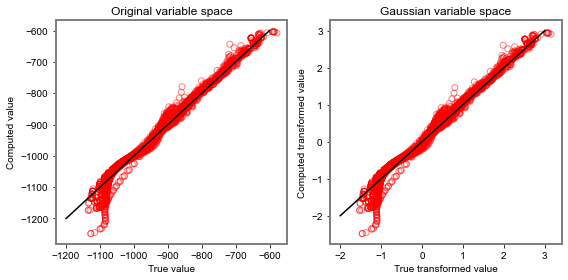

In [36]:
plt.figure(figsize=(8,4))                                                          # Create a pypplot figure
plt.subplot(121)                                                                   # Create a left subplot in the figure
plt.scatter(dfo['BTM'],df['Odist'],facecolors='none',edgecolors='r',alpha=0.5)     # Cross-validation plot
plt.plot([-1200,-600],[-1200,-600],'k-')                                           # plot of the y=x line for reference
plt.title('Original variable space')                                               # plot title
plt.xlabel('True value')                                                           # label of x axis
plt.ylabel('Computed value')                                                       # label of y axis

plt.subplot(122)                                                                   # Create a right subplot in the figure
plt.scatter(dfo['model'],dfo['Odist'],facecolors='none',edgecolors='r',alpha=0.5)  # Cross-validation plot
plt.plot([-2,3],[-2,3],'k-')                                                       # plot of the y=x line for reference
plt.title('Gaussian variable space')                                               # plot title
plt.xlabel('True transformed value')                                               # label of x axis
plt.ylabel('Computed transformed value')                                           # label of y axis

plt.tight_layout()
plt.savefig('Odist_model_validation.png',dpi=500)

### Results

The correlation developed in this notebook was designed can achieve a reasonable fit using relatively simple correlations with predictor features that describe the mixture as a whole instead of a number of arbitrary component-dependent properties. This method of variable selection allows for the creation of a general correlation which can be used with mixtures containing any number of components. <br> 
A linear model was found to be sufficient for modeling the distance between the overall phase and the gas phase. A polynomial model was found to be sufficient for modeling the distance between the overall phase and the oil phase. <br>
However, it is important to note that several rows were deleted from the initial dataset in order to find data that would fit a general correlation. One reason was due to different behavior of the correlations when the overall mixture behaved as a gas versus oil phase. Another reason was that the approximated splitting axis was not sufficiently close to the equilibrium one. Other separate correlations should be developed for these cases.

### Parting Comments / Promote You

If you find any inspiration in this workflow and ideas presented here, feel free to use them and cite this document.

My areas of specialty include thermodynamic modeling, and flud transport simulation. I am currently a PhD student, always looking for an internship or potential connections to eventually obtain a full-time job. Contact me through linkedIn if interested in this idea or other potential applications of similar methodologies. 